<a href="https://colab.research.google.com/github/Ruchik1917/Sentiment_Analysis/blob/main/amazon_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data

In [ ]:
%pip install wordcloud

In [ ]:
%pip install spellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for spellchecker: filename=spellchecker-0.4-py3-none-any.whl size=3966498 sha256=ce800115584613e0927e4976342324c0c1434776c561d9a5f73552c93b8dbdae
  Stored in directory: /root/.cache/pip/wheels/6c/90/c3/eac248d8755b2a7343487a2087b4b29ad98f388c3c8c69c286
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-py3-none-any.whl size=7122 sha256=4896cb12e25f8370d58e5607c1966325d4a008c53dbcf1912c678e5d3f2a3cb6
  Stored in directory: /root/.cache/pip/wheels/63/19/2c/5e9f447f2533d457a1167c3e553f235e232b8a639e3f5fafab
  Created wheel for silpa_common: filename=silpa_common-0.3-py3-none-any.whl size=8465 sha256=a408a83a249e2d30dbaf5f3d4d24633e075b2ad60cb9d4e2ff2191ab00f6dc7c
  Stored in directory: /root/.cache/pip/wheels/c0/72/43/0c77

In [ ]:
pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 16.0 MB/s eta 0:00:00


In [ ]:
import gzip
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.corpus.reader import PlaintextCorpusReader
import os
import spacy
import re
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import re
import nltk
#from spellchecker import SpellChecker
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import pickle

In [ ]:
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [ ]:
lb_path = "/content/drive/MyDrive/Luxury_Beauty_5.json.gz"
parse(lb_path)
LuxuryBeauty = getDF(lb_path)

f_path = "/content/drive/MyDrive/AMAZON_FASHION_5.json.gz"
parse(f_path)
AmazonFashion = getDF(f_path)

ab_path = "/content/drive/MyDrive/All_Beauty_5.json.gz"
parse(ab_path)
AllBeauty = getDF(ab_path)

app_path = "/content/drive/MyDrive/Appliances_5.json.gz"
parse(app_path)
Appliances = getDF(app_path)

industrial_path = "/content/drive/MyDrive/Industrial_and_Scientific_5.json.gz"
parse(industrial_path)
IndustrialAndScientific = getDF(industrial_path)

s_path = "/content/drive/MyDrive/Software_5.json.gz"
parse(s_path)
Software = getDF(s_path)

music = "/content/drive/MyDrive/Digital_Music_5.json.gz"
parse(music)
DigitalMusic = getDF(music)

path_v = "/content/drive/MyDrive/Video_Games_5.json.gz"
parse(path_v)
VideoGame = getDF(path_v)

path_mi = "/content/drive/MyDrive/Musical_Instruments_5.json.gz"
parse(path_mi)
MusicalInstrument = getDF(path_mi)

path_g = "/content/drive/MyDrive/Gift_Cards_5.json.gz"
parse(path_g)
GiftCard = getDF(path_g)

path_ms= "/content/drive/MyDrive/Magazine_Subscriptions_5.json.gz"
parse(path_ms)
MagazineSubs = getDF(path_ms)

path_art = "/content/drive/MyDrive/Arts_Crafts_and_Sewing_5.json.gz"
parse(path_art)
Art = getDF(path_art)

In [ ]:
dfs_list = [LuxuryBeauty, AmazonFashion, AllBeauty, Appliances, IndustrialAndScientific, Software, DigitalMusic, VideoGame, MusicalInstrument, GiftCard, MagazineSubs, Art ]
AllProducts = pd.concat(dfs_list, ignore_index=True)
AllProducts.reset_index(drop=True, inplace=True)

In [ ]:
AllProducts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533458 entries, 0 to 1533457
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   overall         1533458 non-null  float64
 1   verified        1533458 non-null  bool   
 2   reviewTime      1533458 non-null  object 
 3   reviewerID      1533458 non-null  object 
 4   asin            1533458 non-null  object 
 5   style           871967 non-null   object 
 6   reviewerName    1533274 non-null  object 
 7   reviewText      1532752 non-null  object 
 8   summary         1533101 non-null  object 
 9   unixReviewTime  1533458 non-null  int64  
 10  vote            244950 non-null   object 
 11  image           21946 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 130.2+ MB


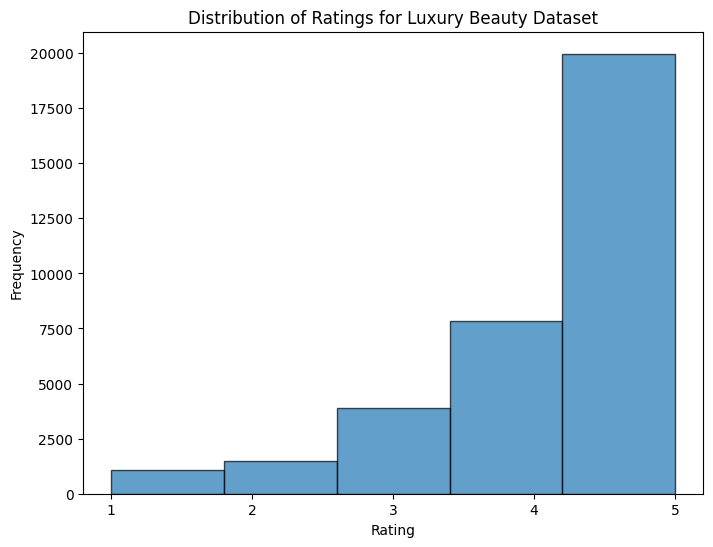

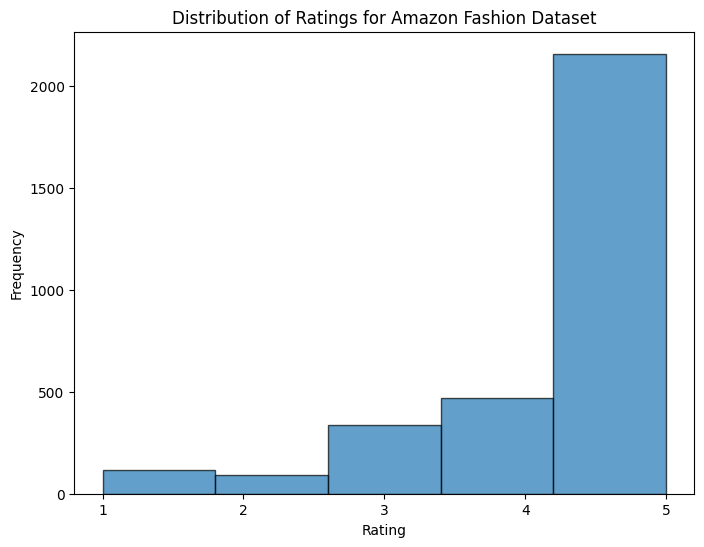

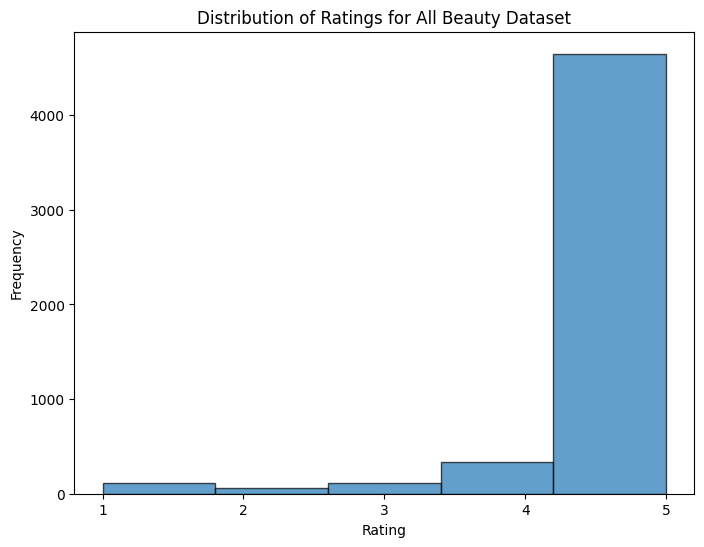

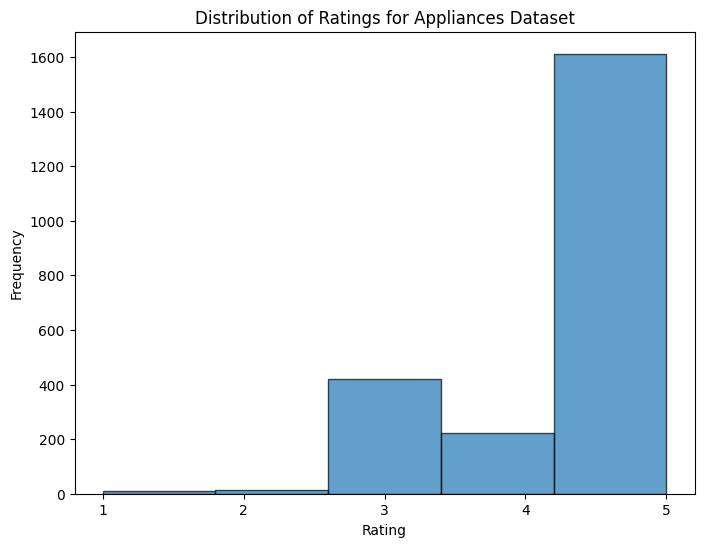

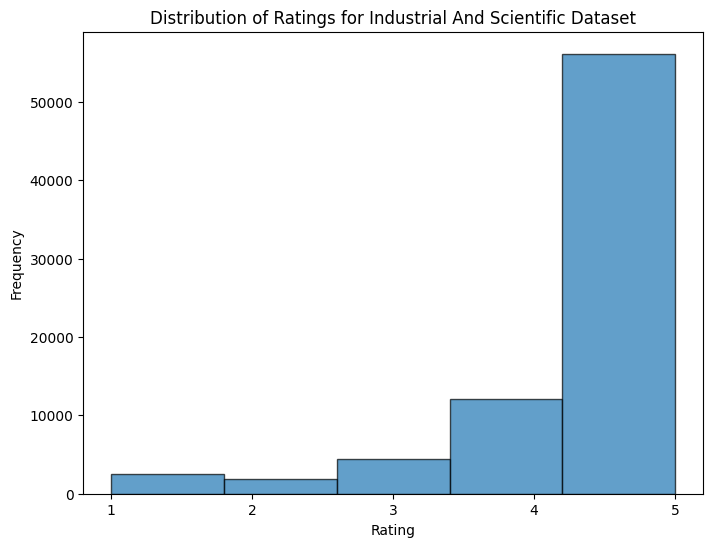

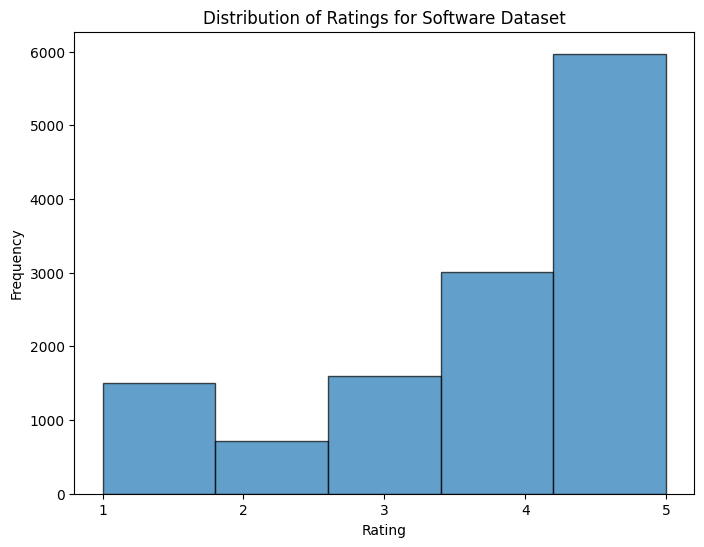

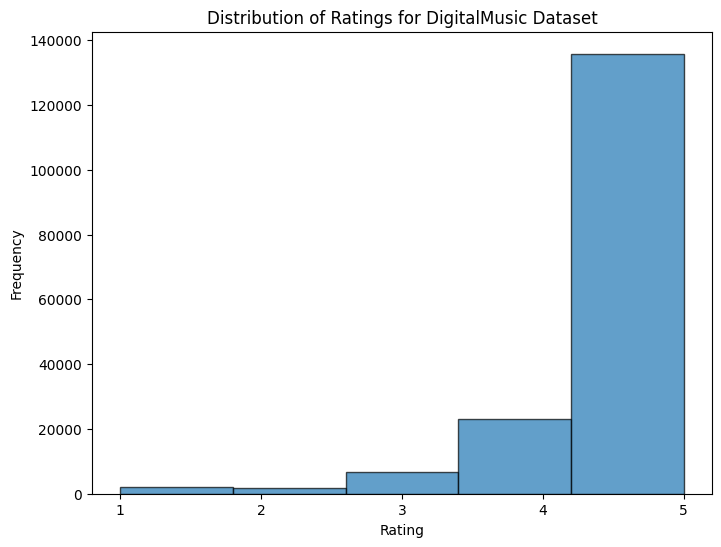

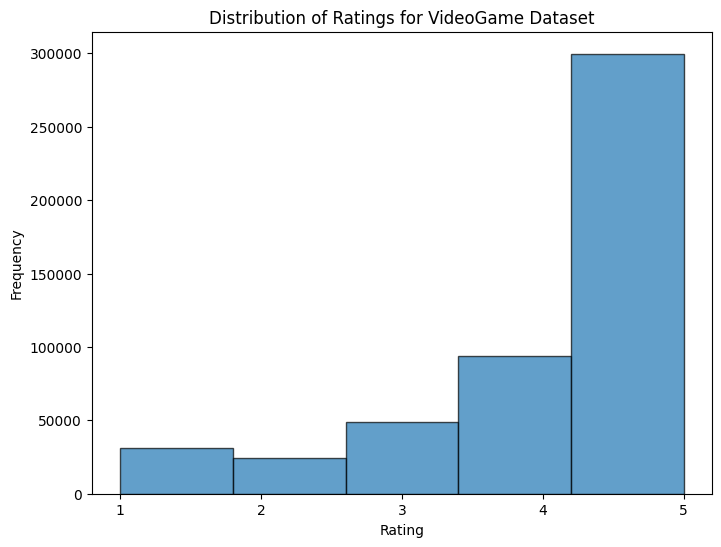

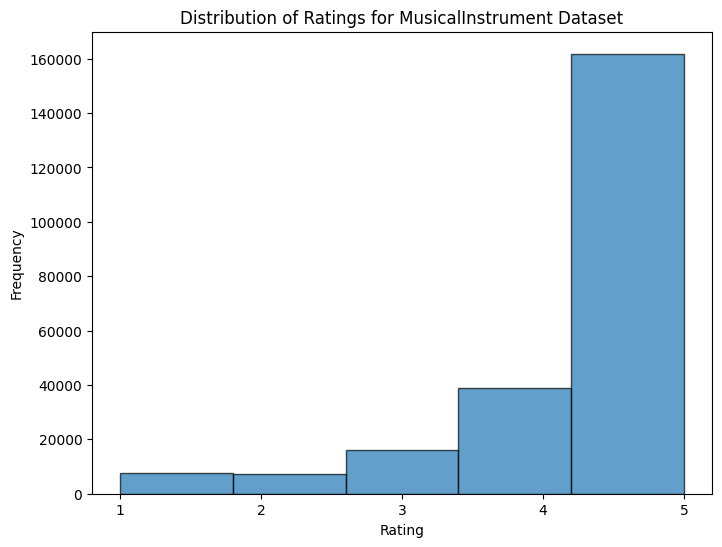

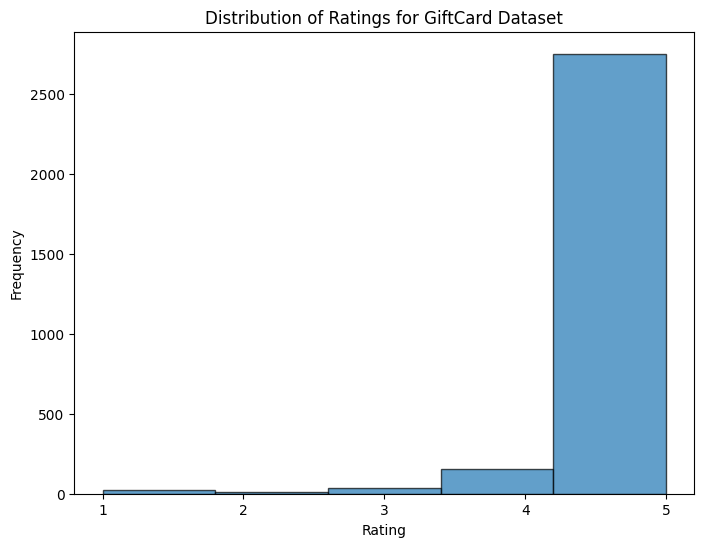

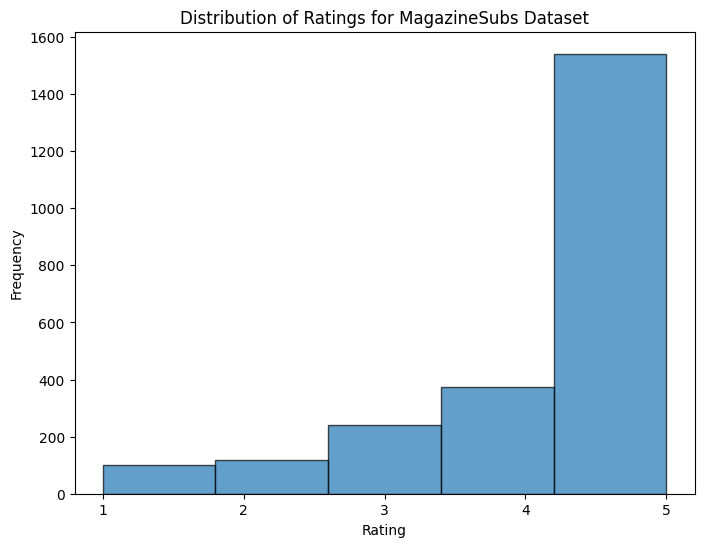

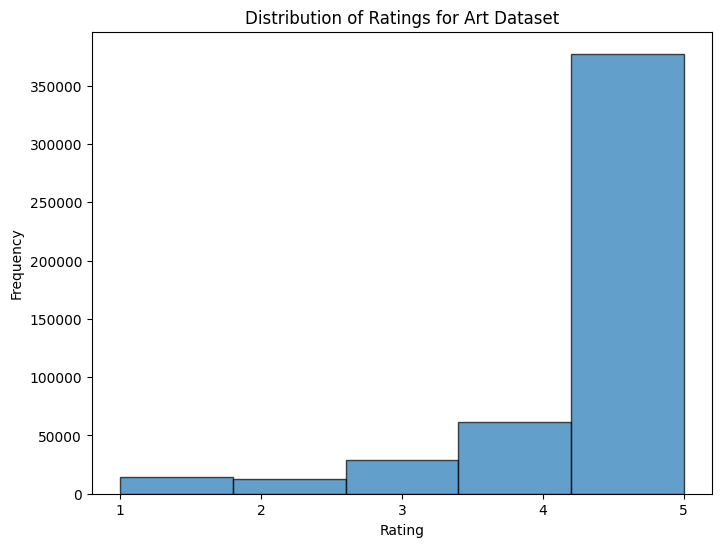

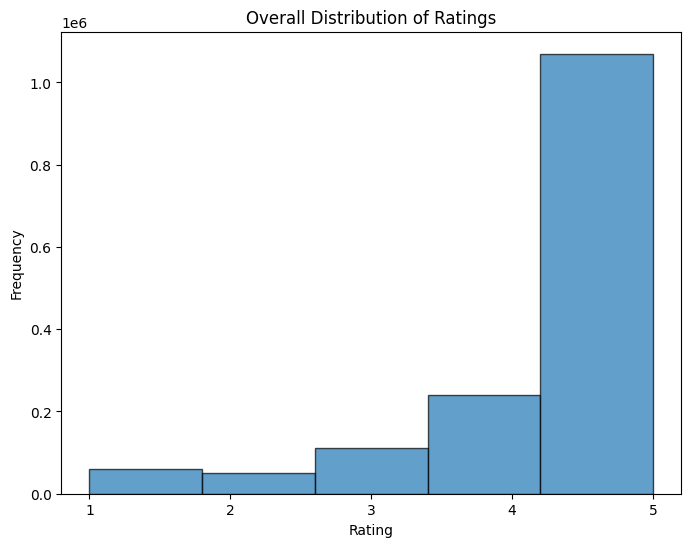

In [ ]:
names_list = ["Luxury Beauty", "Amazon Fashion", "All Beauty", "Appliances", "Industrial And Scientific", "Software","DigitalMusic", "VideoGame", "MusicalInstrument", "GiftCard", "MagazineSubs", "Art"]

# Plot ratings distribution for each dataset
for df, name in zip(dfs_list, names_list):
    ratings = df['overall']
    plt.figure(figsize=(8, 6))
    plt.hist(ratings, bins=5, edgecolor='black', alpha=0.7)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Ratings for {name} Dataset')
    plt.xticks(range(1, 6))
    plt.grid(False)
    plt.show()

# Plot overall ratings distribution
plt.figure(figsize=(8, 6))
plt.hist(AllProducts['overall'], bins=5, edgecolor='black', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Overall Distribution of Ratings')
plt.xticks(range(1, 6))
plt.grid(False)
plt.show()


In [ ]:
rating_1_count = len(AllProducts[AllProducts['overall'] == 1])
print("Number of samples with rating 1:", rating_1_count)

Number of samples with rating 1: 60340


In [ ]:
AllProducts = AllProducts.sample(frac=1, random_state=42)
AllProducts.reset_index(drop=True, inplace=True)

In [ ]:
AllProducts.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"09 15, 2007",A325Q8LI2V97XV,B0002D0CMG,"{'Size:': ' Medium-Light', 'Style:': ' 12 Pack'}",KeziaPurrs,I love the color and feel of these picks. The...,Transparency makes them difficult to use for b...,1189814400,5,NaN
1,5.0,True,"02 21, 2017",A3LIKG3P4IIDED,B003U7WCEM,NaN,Christina mcCutcheon,Used it for a PS3 to hook up to an old crap TV...,... for a PS3 to hook up to an old crap TV for...,1487635200,NaN,NaN
2,2.0,False,"05 1, 2004",AVODMWF2DIKO8,B00004Y57G,{'Format:': ' Video Game'},Michael Cabrera,This game has got to be the worst final fantas...,IS THIS FOR REAL?,1083369600,3,NaN
3,5.0,False,"01 29, 2017",A3QL857ALV5RCJ,B00J228BBM,NaN,Tamara Thorne,I've been using Obagi's Professional-C Peptide...,The Very Best I've Tried,1485648000,NaN,NaN
4,3.0,False,"06 17, 2010",AZAC7B4HD5ZVC,B0016GC9D8,{'Platform:': ' PlayStation 3'},Steven Herring,I have been waiting for this game for over a y...,Most frustrating game of all time,1276732800,NaN,NaN


In [ ]:
AllProducts['reviewText'] = AllProducts['reviewText'].astype(str)
AllProducts['summary'] = AllProducts['summary'].astype(str)

In [ ]:
columns_to_drop = [col for col in AllProducts.columns if col not in ['reviewText', 'overall','summary','verified']]
AllProducts.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
AllProducts=AllProducts[AllProducts['verified']==True]

In [ ]:
AllProducts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261182 entries, 0 to 1533457
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   overall     1261182 non-null  float64
 1   verified    1261182 non-null  bool   
 2   reviewText  1261182 non-null  object 
 3   summary     1261182 non-null  object 
dtypes: bool(1), float64(1), object(2)
memory usage: 39.7+ MB


In [ ]:
AllProducts = AllProducts.dropna(subset=['reviewText','summary'])

In [ ]:
rating_1_count = len(AllProducts[AllProducts['overall'] == 1])
print("Number of samples with rating 1:", rating_1_count)

Number of samples with rating 1: 39065


In [ ]:
rating_2_count = len(AllProducts[AllProducts['overall'] == 2])
print("Number of samples with rating 2:", rating_2_count)

Number of samples with rating 2: 33863


In [ ]:
AllProducts=AllProducts[['overall','reviewText','summary']]

In [ ]:
AllProducts['review'] = AllProducts['reviewText'] + ' ' + AllProducts['summary']

In [ ]:
AllProducts=AllProducts[['overall','review']]

In [ ]:
AllProducts.reset_index(drop=True, inplace=True)

In [ ]:
AllProducts.head()

,overall,review
0,4.0,I love the color and feel of these picks. The...
1,5.0,Used it for a PS3 to hook up to an old crap TV...
2,5.0,Seem to be high quality screws. The heads do n...
3,2.0,Edit 05/26/17 - I upgraded my review from a 1 ...
4,5.0,Great Five Stars


In [ ]:
AllProducts['review'][0]

"I love the color and feel of these picks.  The only problem is that they are semi-transparent and I can see the strings through the pick.  I'm a beginning guitarist and still have to look at the strings as I play.  Because of the transparency I can't really determine the placement of the pick in order to strum the correct string.  Does this make sense???  I hope so.  This is probably a great pick for a seasoned player, but I recommend that beginners use something solid in color. Transparency makes them difficult to use for beginner."

In [ ]:
AllProducts['overall'].value_counts()

5.0    926415
4.0    180832
3.0     81007
1.0     39065
2.0     33863
Name: overall, dtype: int64

In [ ]:
df1 = pd.DataFrame()


for rating in range(1, 6):
    rating_samples = AllProducts[AllProducts['overall'] == rating]
    sampled_rows = rating_samples.sample(n=5000, replace=False)
    df1 = pd.concat([df1, sampled_rows], ignore_index=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   overall  25000 non-null  float64
 1   review   25000 non-null  object 
dtypes: float64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
df1.describe()

,overall
count,25000.000000
mean,3.000000
std,1.414242
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


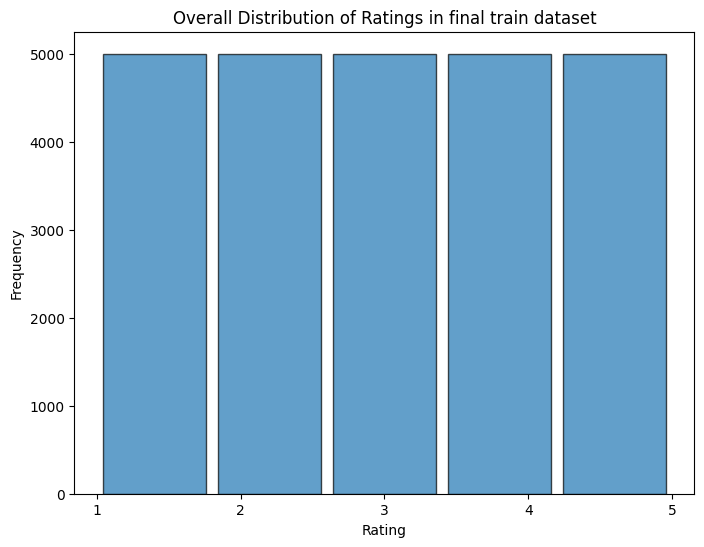

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df1['overall'], bins=5, edgecolor='black', alpha=0.7,rwidth=0.9)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Overall Distribution of Ratings in final train dataset')
plt.xticks(range(1, 6))
plt.grid(False)
plt.show()

In [ ]:
df1 = df1.sample(frac=1, random_state=42)
df1.reset_index(drop=True, inplace=True)

In [ ]:
df1.reset_index(drop=True, inplace=True)

In [ ]:
df1.head()

,overall,review
0,2.0,Not that impressed with this art kit. I don't ...
1,5.0,I use these for so many things. They are great...
2,2.0,Are fine but faded in some parts what was diss...
3,3.0,These are a very great price for a full set of...
4,3.0,this game just didn't do justice on me. I exp...


# Data Preprocessing

## Lower

In [ ]:
df1["cleaned_review"]=df1["review"].str.lower()

In [ ]:
df1.head()

,overall,review,cleaned_review
0,2.0,Not that impressed with this art kit. I don't ...,not that impressed with this art kit. i don't ...
1,5.0,I use these for so many things. They are great...,i use these for so many things. they are great...
2,2.0,Are fine but faded in some parts what was diss...,are fine but faded in some parts what was diss...
3,3.0,These are a very great price for a full set of...,these are a very great price for a full set of...
4,3.0,this game just didn't do justice on me. I exp...,this game just didn't do justice on me. i exp...


## Handling data with apostrophe

In [ ]:
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}


In [ ]:
def apply_mapping(row):
  review = row['cleaned_review']
  for key, value in appos.items():
    review = review.replace(key, value)
  return review

df1['cleaned_review'] = df1.apply(apply_mapping, axis=1)

In [ ]:
df1.head(30)

,overall,review,cleaned_review
0,2.0,Not that impressed with this art kit. I don't ...,not that impressed with this art kit. i do not...
1,5.0,I use these for so many things. They are great...,i use these for so many things. they are great...
2,2.0,Are fine but faded in some parts what was diss...,are fine but faded in some parts what was diss...
3,3.0,These are a very great price for a full set of...,these are a very great price for a full set of...
4,3.0,this game just didn't do justice on me. I exp...,this game just did not do justice on me. i ex...
5,2.0,It can be fun to sometimes play as a supernatu...,it can be fun to sometimes play as a supernatu...
6,2.0,"Had I thought this out a little bit, I would n...","had i thought this out a little bit, i would n..."
7,3.0,Not a mold for beginners. if you don't get the...,not a mold for beginners. if you do not get th...
8,1.0,"I returned this item, didn't do what I wanted ...","i returned this item, did not do what i wanted..."
9,2.0,"Oh man, how I wanted to love this game. I've ...","oh man, how i wanted to love this game. I hav..."


## Removing Punctuation

In [ ]:
import string
exclude=string.punctuation

In [ ]:
def remove_punc(text):
    if isinstance(text, str):
        for char in exclude:
            text = text.replace(char, ' ')
        return text
    else:
        return str(text)

In [ ]:
df1['cleaned_review']=df1['cleaned_review'].apply(remove_punc)

In [ ]:
df1.head()

,overall,review,cleaned_review
0,2.0,Not that impressed with this art kit. I don't ...,not that impressed with this art kit i do not...
1,5.0,I use these for so many things. They are great...,i use these for so many things they are great...
2,2.0,Are fine but faded in some parts what was diss...,are fine but faded in some parts what was diss...
3,3.0,These are a very great price for a full set of...,these are a very great price for a full set of...
4,3.0,this game just didn't do justice on me. I exp...,this game just did not do justice on me i ex...


## Removing numbers

In [ ]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Apply the function to the 'review' column
df1['cleaned_review'] = df1['cleaned_review'].apply(remove_numbers)

## Removing HTML Tags

In [ ]:
def remove_html_tag(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

In [ ]:
df1['cleaned_review']=df1['cleaned_review'].apply(remove_html_tag)

## Removing \n

In [ ]:
df1['cleaned_review'] = df1['cleaned_review'].apply(lambda x: x.replace("\n"," "))

In [ ]:
df1['cleaned_review'][19666]

'crumbly  too many snail shells  dirty looking mix  too many brown snail shells '

In [ ]:
df1['cleaned_review'] = df1['cleaned_review'].str.replace(' +', ' ')

<ipython-input-863-6f006b97fb46>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['cleaned_review'] = df1['cleaned_review'].str.replace(' +', ' ')


In [ ]:
df1['review'][19666]

'Crumbly, too many snail shells, dirty looking mix. Too many brown snail shells!'

In [ ]:
df1['cleaned_review'][19666]

'crumbly too many snail shells dirty looking mix too many brown snail shells '

## Removing Stopwords

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
stop_words = set(stopwords.words('english'))
df1['cleaned_review'] = df1['cleaned_review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

In [ ]:
df1

,overall,review,cleaned_review
0,2.0,Not that impressed with this art kit. I don't ...,impressed art kit think enough variety mediums...
1,5.0,I use these for so many things. They are great...,use many things great sell small products craf...
2,2.0,Are fine but faded in some parts what was diss...,fine faded parts dissapointing still usable kn...
3,3.0,These are a very great price for a full set of...,great price full set circular needles bamboo p...
4,3.0,this game just didn't do justice on me. I exp...,game justice expected lot alright
...,...,...,...
24995,5.0,These are pretty much the only electric string...,pretty much electric strings use acoustic equi...
24996,2.0,Good lil weird Two Stars,good lil weird two stars
24997,1.0,"It arrived broken at the neck, so have to retu...",arrived broken neck return may try post update...
24998,4.0,Rise of the argonauts is a Great game. If you ...,rise argonauts great game ever played secret m...


## Stemming

In [ ]:
stemmer = nltk.PorterStemmer()
# Stem the reviews column
df1['cleaned_review'] = df1['cleaned_review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

## Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df1['cleaned_review'] = df1['cleaned_review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split(' ')]))

## Removing words with underscore or words with length less than 3


In [ ]:
def remove_single_letters_and_underscore_words(text):
    words = text.split()
    filtered_words = [word for word in words if len(word) > 2 and '_' not in word]
    return ' '.join(filtered_words)

In [ ]:
df1['cleaned_review'] = df1['cleaned_review'].apply(remove_single_letters_and_underscore_words)

In [ ]:
df1

,overall,review,cleaned_review
0,2.0,Not that impressed with this art kit. I don't ...,impressed art kit think enough variety medium ...
1,5.0,I use these for so many things. They are great...,use many thing great sell small product craft ...
2,2.0,Are fine but faded in some parts what was diss...,fine faded part dissapointing still usable kno...
3,3.0,These are a very great price for a full set of...,great price full set circular needle bamboo pa...
4,3.0,this game just didn't do justice on me. I exp...,game justice expected lot alright
...,...,...,...
24995,5.0,These are pretty much the only electric string...,pretty much electric string use acoustic equiv...
24996,2.0,Good lil weird Two Stars,good lil weird two star
24997,1.0,"It arrived broken at the neck, so have to retu...",arrived broken neck return may try post update...
24998,4.0,Rise of the argonauts is a Great game. If you ...,rise argonaut great game ever played secret ma...


## Removing words like one star


In [ ]:
# Define words to remove
words_to_remove = ['one', 'two', 'three', 'four', 'five', 'star', 'stars','game', 'games', 'music', 'song', 'product', 'products']

# Define a function to remove specific words from text
def remove_specific_words(text):
    pattern = r'\b(?:' + '|'.join(words_to_remove) + r')\b'
    return re.sub(pattern, '', text)

# Apply the function to the 'cleaned_review' column
df1['cleaned_review'] = df1['cleaned_review'].apply(remove_specific_words)

In [ ]:
df1

,overall,review,cleaned_review
0,2.0,Not that impressed with this art kit. I don't ...,impressed art kit think enough variety medium ...
1,5.0,I use these for so many things. They are great...,use many thing great sell small craft show al...
2,2.0,Are fine but faded in some parts what was diss...,fine faded part dissapointing still usable kno...
3,3.0,These are a very great price for a full set of...,great price full set circular needle bamboo pa...
4,3.0,this game just didn't do justice on me. I exp...,justice expected lot alright
...,...,...,...
24995,5.0,These are pretty much the only electric string...,pretty much electric string use acoustic equiv...
24996,2.0,Good lil weird Two Stars,good lil weird
24997,1.0,"It arrived broken at the neck, so have to retu...",arrived broken neck return may try post update...
24998,4.0,Rise of the argonauts is a Great game. If you ...,rise argonaut great ever played secret mana s...


# Analysis of reviews

In [ ]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df1.review)

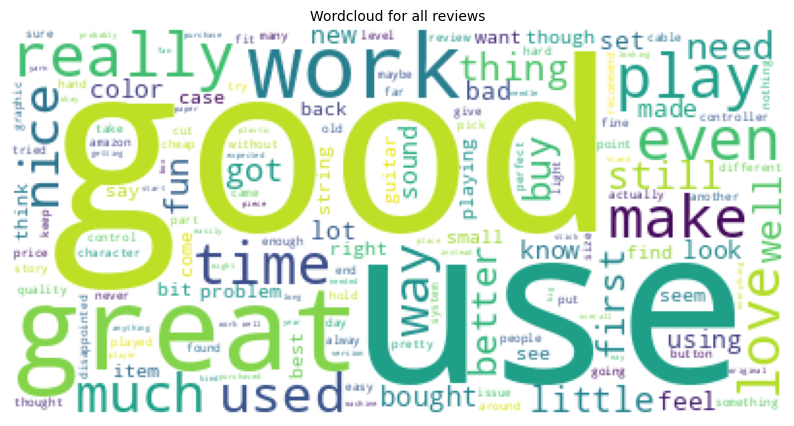

In [ ]:
# Combine all reviews
reviews = " ".join([review for review in df1['cleaned_review']])
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words = 150)
# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

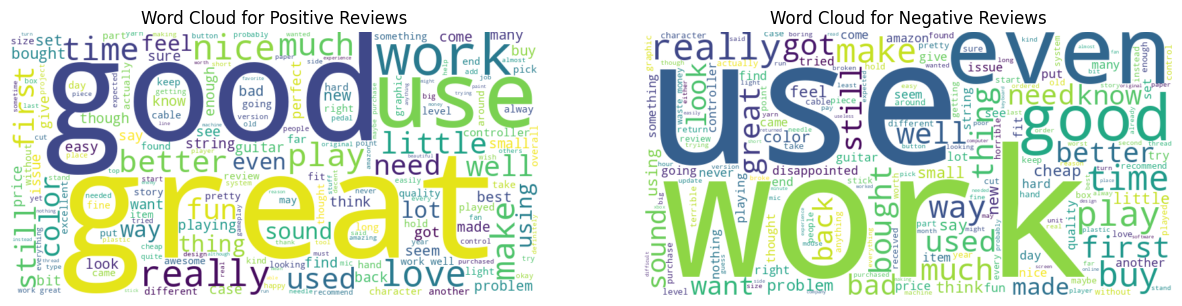

In [ ]:
# Extract positive reviews (ratings 3, 4, 5)
positive_reviews = df1[df1['overall'].isin([3, 4, 5])]['cleaned_review']

# Join positive reviews into a single string
positive_reviews_str = ' '.join(positive_reviews)

# Extract negative reviews (ratings 1, 2)
negative_reviews = df1[df1['overall'].isin([1, 2])]['cleaned_review']

# Join negative reviews into a single string
negative_reviews_str = ' '.join(negative_reviews)

# Create WordCloud objects for positive and negative reviews
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_str)
negative_wc = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews_str)

# Plot word clouds
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.show()


In [ ]:
reviews = df1['cleaned_review'].tolist()
vectorizer = CountVectorizer(max_features=50)
vectorizer.fit(reviews)
word_counts = vectorizer.transform(reviews)
total_word_counts = word_counts.sum(axis=0)
vocabulary = vectorizer.get_feature_names_out()
word_frequencies = [(vocabulary[i], total_word_counts[0, i]) for i in range(len(vocabulary))]
word_frequencies.sort(key=lambda x: x[1], reverse=True)

print("Top 50 words with their frequencies:")
for word, frequency in word_frequencies[:50]:
    print(f"{word}: {frequency}")

Top 50 words with their frequencies:
like: 6093
good: 5781
great: 4857
get: 4582
work: 4582
would: 4173
use: 3860
time: 3661
really: 3252
well: 2809
much: 2701
play: 2525
even: 2431
make: 2400
better: 2309
love: 2090
quality: 1991
nice: 1989
first: 1964
could: 1961
buy: 1898
little: 1868
sound: 1834
thing: 1832
price: 1822
way: 1811
used: 1795
fun: 1786
also: 1764
color: 1734
still: 1676
back: 1669
bought: 1637
got: 1627
need: 1619
look: 1588
lot: 1541
bad: 1481
made: 1472
new: 1408
want: 1408
pretty: 1369
feel: 1364
money: 1364
using: 1321
set: 1307
guitar: 1277
say: 1252
small: 1230
hard: 1213


In [ ]:
reviews = df1['cleaned_review'].tolist()
vectorizer = CountVectorizer(max_features=150)
vectorizer.fit(reviews)
word_counts = vectorizer.transform(reviews)
total_word_counts = word_counts.sum(axis=0)
vocabulary = vectorizer.get_feature_names_out()
word_frequencies = [(vocabulary[i], total_word_counts[0, i]) for i in range(len(vocabulary))]
word_frequencies.sort(key=lambda x: x[1], reverse=True)

print("Top 50 words with their frequencies:")
for word, frequency in word_frequencies[:150]:
    print(f"{word}: {frequency}")

Top 50 words with their frequencies:
like: 6093
good: 5781
great: 4857
get: 4582
work: 4582
would: 4173
use: 3860
time: 3661
really: 3252
well: 2809
much: 2701
play: 2525
even: 2431
make: 2400
better: 2309
love: 2090
quality: 1991
nice: 1989
first: 1964
could: 1961
buy: 1898
little: 1868
sound: 1834
thing: 1832
price: 1822
way: 1811
used: 1795
fun: 1786
also: 1764
color: 1734
still: 1676
back: 1669
bought: 1637
got: 1627
need: 1619
look: 1588
lot: 1541
bad: 1481
made: 1472
new: 1408
want: 1408
pretty: 1369
feel: 1364
money: 1364
using: 1321
set: 1307
guitar: 1277
say: 1252
small: 1230
hard: 1213
problem: 1209
know: 1208
think: 1182
right: 1172
review: 1164
easy: 1163
bit: 1155
many: 1152
playing: 1137
year: 1135
string: 1110
controller: 1101
something: 1081
come: 1079
enough: 1070
never: 1060
different: 1057
see: 1052
best: 1048
take: 1043
find: 1033
another: 1029
cheap: 1015
though: 1010
give: 1003
long: 995
going: 983
fit: 977
fine: 975
sure: 972
put: 967
however: 960
item: 960
worth

In [ ]:
vectorizer = CountVectorizer(ngram_range=(2, 2))
vectorizer.fit(reviews)
word_counts = vectorizer.transform(reviews)
total_word_counts = word_counts.sum(axis=0)
vocabulary = vectorizer.get_feature_names_out()
word_frequencies = [(vocabulary[i], total_word_counts[0, i]) for i in range(len(vocabulary))]
word_frequencies.sort(key=lambda x: x[1], reverse=True)

print("Top 20 bigrams with their frequencies:")
for word, frequency in word_frequencies[:20]:
    print(f"{word}: {frequency}")

Top 20 bigrams with their frequencies:
work well: 515
work great: 380
feel like: 363
waste money: 355
would recommend: 349
much better: 315
look like: 310
work fine: 240
good quality: 220
thought would: 217
pretty good: 202
easy use: 198
first time: 195
good price: 188
could get: 185
even though: 185
pretty much: 182
really like: 181
year old: 174
well made: 172


In [ ]:
vectorizer = CountVectorizer(ngram_range=(3, 3))
vectorizer.fit(reviews)
word_counts = vectorizer.transform(reviews)
total_word_counts = word_counts.sum(axis=0)
vocabulary = vectorizer.get_feature_names_out()
trigram_frequencies = [(vocabulary[i], total_word_counts[0, i]) for i in range(len(vocabulary))]
trigram_frequencies.sort(key=lambda x: x[1], reverse=True)

print("Top 20 trigrams with their frequencies:")
for trigram, frequency in trigram_frequencies[:20]:
    print(f"{trigram}: {frequency}")

Top 20 trigrams with their frequencies:
arp rvw txt: 115
class link normal: 115
data hook link: 115
hook link linked: 115
link linked class: 115
link normal href: 115
linked class link: 115
ref arp rvw: 115
rvw txt utf: 115
nbsp data hook: 88
get job done: 56
waste time money: 42
first person shooter: 38
really wanted like: 37
would recommend anyone: 36
first time used: 32
amazon com image: 30
hidden name value: 30
http image ssl: 30
image amazon com: 30


# Prediction of Ratings - Multi Class

## Using CountVectorizer to initialize weights for word embeddings

In [ ]:
vectorizer = CountVectorizer(max_features=10000)

In [ ]:
X = vectorizer.fit_transform(df1['cleaned_review'])

In [ ]:
from sklearn.model_selection import train_test_split

# Assume X and y are your features and labels
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df1['overall'], test_size=0.2, shuffle = False)

### MultiNomial Naive Bayes

In [ ]:
MultinomialNaiveBayes = MultinomialNB()
MultinomialNaiveBayes.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = MultinomialNaiveBayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.444


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.55      0.61      0.58       987
         2.0       0.34      0.30      0.32       945
         3.0       0.38      0.28      0.32      1006
         4.0       0.37      0.34      0.35       994
         5.0       0.50      0.67      0.57      1068

    accuracy                           0.44      5000
   macro avg       0.43      0.44      0.43      5000
weighted avg       0.43      0.44      0.43      5000



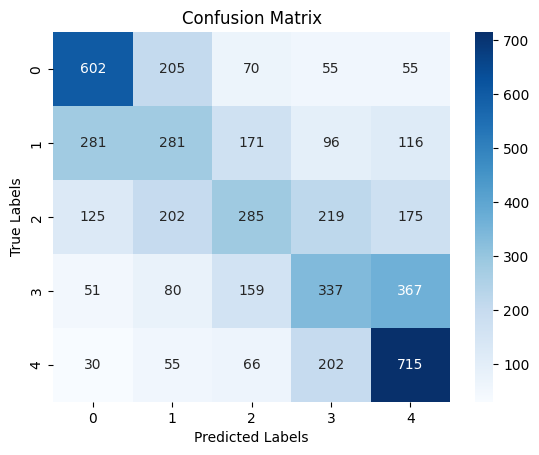

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
import random

misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: This is the first TSO purchase I wish I didn't make. I guess it's just different than what I was Hoping for. Disappointing
Predicted label: 3.0
True label: 1.0


Another Misclassified Review: More comfortable than the stock thumb grips. Definitely worth the $ IMO. Very Comfortable
Predicted label: 4.0
True label: 5.0


### Gaussian NaiveBayes

In [ ]:
vectorizer = CountVectorizer(max_features=2500)

In [ ]:
X = vectorizer.fit_transform(df1['cleaned_review'])

In [ ]:
from sklearn.model_selection import train_test_split

# Assume X and y are your features and labels
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df1['overall'], test_size=0.2, shuffle = False)

In [ ]:
GaussianNaiveBayes = GaussianNB()
GaussianNaiveBayes.fit(X_train.toarray(), y_train)

GaussianNB()

In [ ]:
y_pred = GaussianNaiveBayes.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3112


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.42      0.37      0.39       987
         2.0       0.29      0.15      0.20       945
         3.0       0.28      0.09      0.13      1006
         4.0       0.27      0.09      0.14       994
         5.0       0.29      0.81      0.43      1068

    accuracy                           0.31      5000
   macro avg       0.31      0.30      0.26      5000
weighted avg       0.31      0.31      0.26      5000



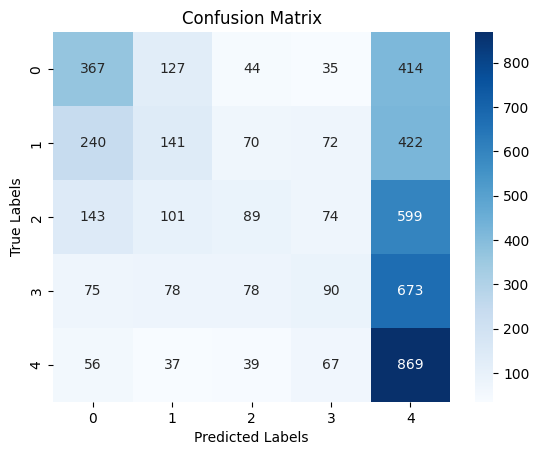

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: Better off with a glue of some sort. I'm also not a DIY-er, and this was quite a bit of labor to get it to work properly. Better off with a glue of some sort
Predicted label: 5.0
True label: 2.0


Another Misclassified Review: These picks are very comfortable to wear, but I find them pretty useless for picking the banjo. The cutout for the finger pad is great for feeling the location of the string, but when picking, the string catches in the end of the cutout and causes your finger to hang-up. This prevents you from playing an effective continuous roll pattern. However, on the dobro, with larger gauge strings, this isn't a problem. That being said, I don't get the same volume picking with these compared to solid National's or Dunlop's. I like the fit, I like the feel, but the results aren't that spectacular. Also, don't expect to get them anytime soon when you order them in the U.S. They will spend a considerable amount of time in customs before you receive your p

In [ ]:
vectorizer = CountVectorizer(max_features=10000)

In [ ]:
X = vectorizer.fit_transform(df1['cleaned_review'])

In [ ]:
from sklearn.model_selection import train_test_split

# Assume X and y are your features and labels
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df1['overall'], test_size=0.2, shuffle = False)

### Decision Tree - entroy

In [ ]:
dt_entropy = DecisionTreeClassifier(criterion='entropy') # Decision tree with entropy criterion
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = dt_entropy.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3548


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.42      0.43      0.43       793
         2.0       0.31      0.28      0.30       796
         3.0       0.28      0.29      0.29       790
         4.0       0.28      0.29      0.29       778
         5.0       0.47      0.49      0.48       843

    accuracy                           0.36      4000
   macro avg       0.35      0.36      0.35      4000
weighted avg       0.36      0.36      0.36      4000



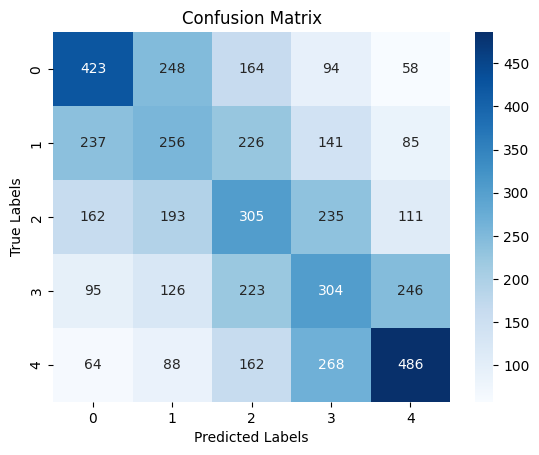

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: Has a nice beat and is easy to dance to. I give it a rating based upon my tastes. Your mileage may differ! Meh....
Predicted label: 4.0
True label: 2.0


Another Misclassified Review: I ordered these GelTab thumb grips for my PS4 remote because the original thumb sticks on a Sony Duel-shock controller made my thumbs sore, these defiantly helped ALOT. No complaints what so ever on the product :) Great price too! Just as you'd expect :D
Predicted label: 4.0
True label: 5.0


### Decision Tree - Gini

In [ ]:
dt_gini = DecisionTreeClassifier(criterion='gini') # Decision tree with gini criterion
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt_gini.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3626


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.46      0.44      0.45       987
         2.0       0.28      0.28      0.28       945
         3.0       0.30      0.31      0.30      1006
         4.0       0.30      0.31      0.31       994
         5.0       0.48      0.46      0.47      1068

    accuracy                           0.36      5000
   macro avg       0.36      0.36      0.36      5000
weighted avg       0.37      0.36      0.36      5000



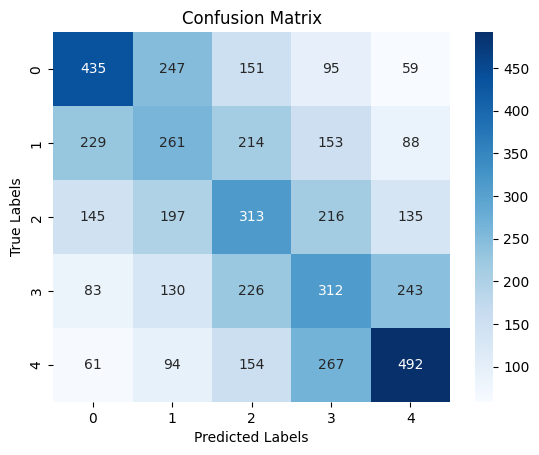

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])


Misclassified Review: I bought this along with Ninja Gaiden Sigma (1). The graphics and game play is better than part one,
but still the same way of fighting enemies. The hack and slash of this game is boring and is not fluid. and I am not motivated to play it at all. Better than Sigma 1, but still...
Predicted label: 2.0
True label: 3.0


Another Misclassified Review: game had too many  erros to play returned to amazon for refuns game had too many erros to play returned to amazon ...
Predicted label: 1.0
True label: 2.0


### Random Forest - 20 Trees

In [ ]:
rf_20 = RandomForestClassifier(n_estimators=20) # Random forest with 20 trees
rf_20.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
y_pred = rf_20.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4068


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.46      0.58      0.52       987
         2.0       0.30      0.26      0.28       945
         3.0       0.35      0.31      0.33      1006
         4.0       0.34      0.33      0.33       994
         5.0       0.54      0.54      0.54      1068

    accuracy                           0.41      5000
   macro avg       0.40      0.40      0.40      5000
weighted avg       0.40      0.41      0.40      5000



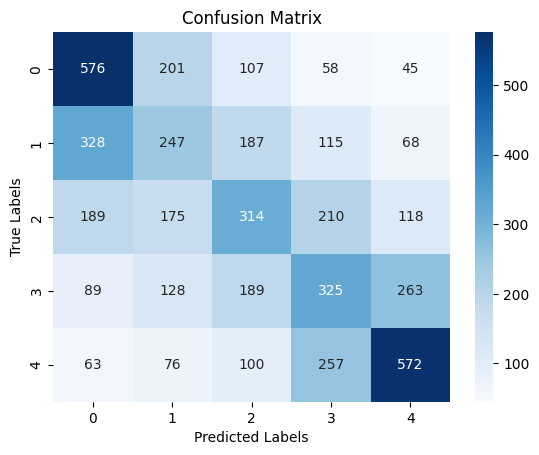

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])

Misclassified Review: good to hold plenty e-juice Five Stars
Predicted label: 4.0
True label: 5.0


Another Misclassified Review: Great. Four Stars
Predicted label: 5.0
True label: 4.0


### Random Forest - 50 trees


In [ ]:
rf_50 = RandomForestClassifier(n_estimators=50) # Random forest with 20 trees
rf_50.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred = rf_50.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4206


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.50      0.62      0.55       987
         2.0       0.31      0.27      0.28       945
         3.0       0.35      0.30      0.33      1006
         4.0       0.34      0.35      0.34       994
         5.0       0.55      0.56      0.56      1068

    accuracy                           0.42      5000
   macro avg       0.41      0.42      0.41      5000
weighted avg       0.41      0.42      0.41      5000



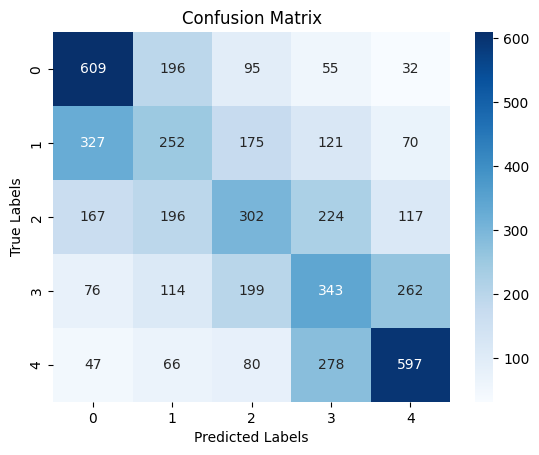

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])

Misclassified Review: Normal game Three Stars
Predicted label: 2.0
True label: 3.0


Another Misclassified Review: Over 370 pieces? I don't think so. Returned for Amazon credit. Not a good value
Predicted label: 2.0
True label: 1.0


### Random Forest - 100 trees

In [ ]:
rf_100 = RandomForestClassifier(n_estimators=100) # Random forest with 20 trees
rf_100.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_100.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4412


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.51      0.63      0.56       987
         2.0       0.33      0.28      0.30       945
         3.0       0.39      0.34      0.36      1006
         4.0       0.36      0.35      0.36       994
         5.0       0.56      0.58      0.57      1068

    accuracy                           0.44      5000
   macro avg       0.43      0.44      0.43      5000
weighted avg       0.43      0.44      0.43      5000



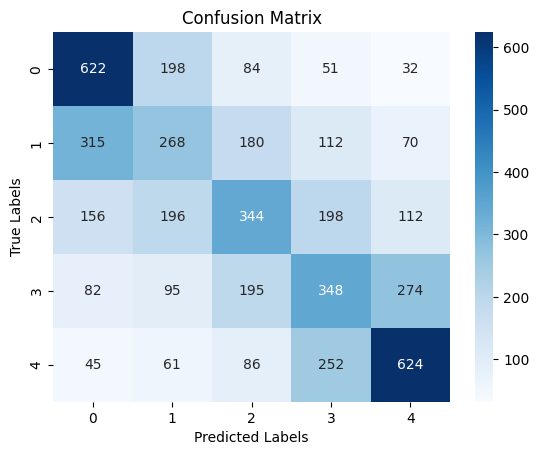

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])

Misclassified Review: very cheaply made, finger sleeves didn't even fit my 9 year old granddaughter. wouldn't buy again
Predicted label: 1.0
True label: 2.0


Another Misclassified Review: I give five star to this item Five Stars
Predicted label: 3.0
True label: 5.0


## Using Tf-Idf for weights initialization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=10000, stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(df1['cleaned_review'])

tfidf.shape

(25000, 10000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, df1['overall'], test_size=0.2, shuffle = False)

### Multinomial Naive Bayes

In [ ]:
MultinomialNaiveBayes = MultinomialNB()
MultinomialNaiveBayes.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = MultinomialNaiveBayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4408


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.56      0.59      0.57       987
         2.0       0.33      0.38      0.36       945
         3.0       0.37      0.31      0.33      1006
         4.0       0.36      0.37      0.37       994
         5.0       0.59      0.54      0.56      1068

    accuracy                           0.44      5000
   macro avg       0.44      0.44      0.44      5000
weighted avg       0.44      0.44      0.44      5000



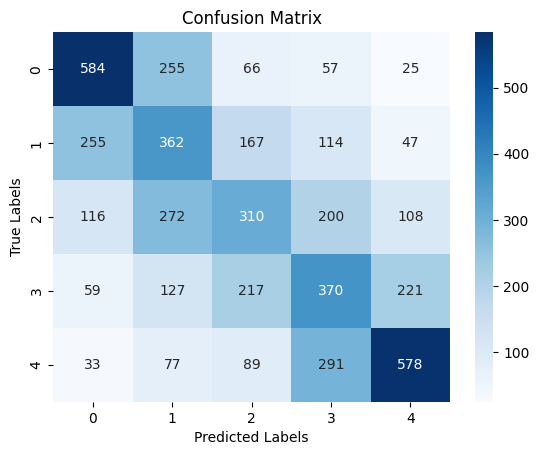

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: There are a lot of versions of this song out there. This is not the right one to download. It's taken from a compilation album and starts and ends ubruptly because it was very sloply hacked from the original album. Good song, bad version
Predicted label: 3.0
True label: 1.0


Another Misclassified Review: Oldies but goodies Oldies but goodies
Predicted label: 3.0
True label: 4.0


### Gausian Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=2000, stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(df1['cleaned_review'])

tfidf.shape

(25000, 2000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, df1['overall'], test_size=0.2, shuffle = False)

In [ ]:
GaussianNaiveBayes = GaussianNB()
GaussianNaiveBayes.fit(X_train.toarray(), y_train)

GaussianNB()

In [ ]:
y_pred = GaussianNaiveBayes.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3592


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.47      0.49      0.48       987
         2.0       0.30      0.22      0.25       945
         3.0       0.29      0.19      0.23      1006
         4.0       0.27      0.14      0.18       994
         5.0       0.37      0.74      0.49      1068

    accuracy                           0.36      5000
   macro avg       0.34      0.35      0.33      5000
weighted avg       0.34      0.36      0.33      5000



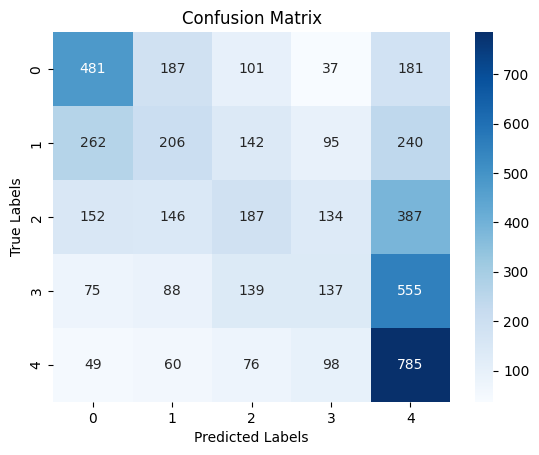

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])

Misclassified Review: If you have a Wii, you need a charging station. It pays for itself quickly,

Be aware that this charging station only fits standard-sized Wiimotes. If you have a mini-Wiimote, or any kind of differently-shaped Wiimote, the battery packs may not fit. However, if you have the normal Wii-motes (brand name or generic as long as they are the same size and shape) they work great.

I haven't tested how long the batteries last because I put the Wiimotes back on the charger when I'm done playing, but they've never fallen below 75% even when playing for a couple hours. Why buy disposable batteries?
Predicted label: 1.0
True label: 5.0


Another Misclassified Review: I purchased this for my wife for Christmas. She has yet to figure out what to do with it. We are going to have to go purchase a book about how to put a quilt together because the directions that come with the pre-cut fabric are  use less unless you have put together many quilts like this and know how to do them 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=10000, stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(df1['cleaned_review'])

tfidf.shape

(25000, 10000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, df1['overall'], test_size=0.2, shuffle = False)

### Decision Tree - entropy

In [ ]:
dt_entropy = DecisionTreeClassifier(criterion='entropy') # Decision tree with entropy criterion
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = dt_entropy.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3758


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.45      0.45      0.45       987
         2.0       0.30      0.32      0.31       945
         3.0       0.31      0.31      0.31      1006
         4.0       0.31      0.32      0.31       994
         5.0       0.51      0.48      0.50      1068

    accuracy                           0.38      5000
   macro avg       0.38      0.37      0.38      5000
weighted avg       0.38      0.38      0.38      5000



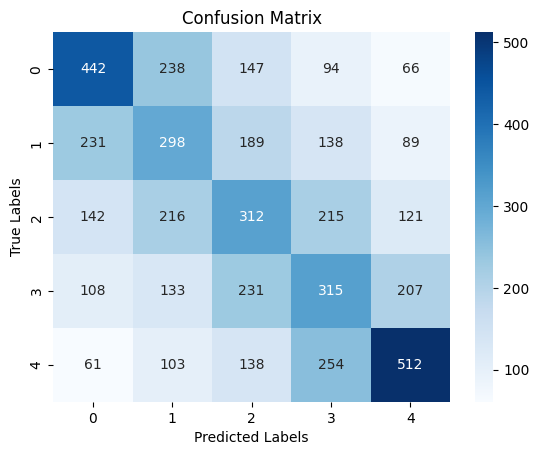

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: Nice mats, but I wish they had grid markings on them. Three Stars
Predicted label: 4.0
True label: 3.0


Another Misclassified Review: Not very good.  I tried it on many of my guitars.  It did not pick up the tuning on the low "E" at any fret! It also took a long time to lock in on the note. It did not respond at all correctly on the head stock. Not recommended. Not very good. I tried it on many of my guitars
Predicted label: 3.0
True label: 1.0


### Decision Tree - Gini

In [ ]:
dt_gini = DecisionTreeClassifier(criterion='gini') # Decision tree with gini criterion
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt_gini.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.376


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.47      0.49      0.48       987
         2.0       0.32      0.30      0.31       945
         3.0       0.31      0.32      0.31      1006
         4.0       0.29      0.30      0.29       994
         5.0       0.50      0.46      0.48      1068

    accuracy                           0.38      5000
   macro avg       0.38      0.37      0.37      5000
weighted avg       0.38      0.38      0.38      5000



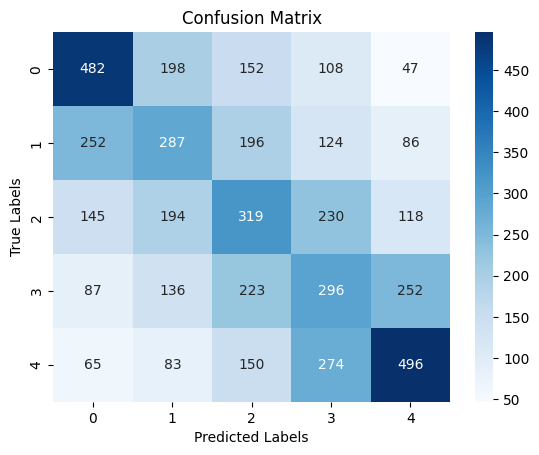

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: Right length for my needs, but glass heads are way too small for easy grasping.  Threw them away. but glass heads are way too small for easy grasping. Threw them away
Predicted label: 3.0
True label: 2.0


Another Misclassified Review: I only use one of the tools in the set. The others just don't have any value to me. Cricut
Predicted label: 2.0
True label: 3.0


### Random Forest - 20 trees

In [ ]:
rf_20 = RandomForestClassifier(n_estimators=20) # Random forest with 20 trees
rf_20.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
y_pred = rf_20.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4262


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.49      0.60      0.54       987
         2.0       0.32      0.32      0.32       945
         3.0       0.36      0.33      0.34      1006
         4.0       0.36      0.32      0.34       994
         5.0       0.57      0.56      0.56      1068

    accuracy                           0.43      5000
   macro avg       0.42      0.42      0.42      5000
weighted avg       0.42      0.43      0.42      5000



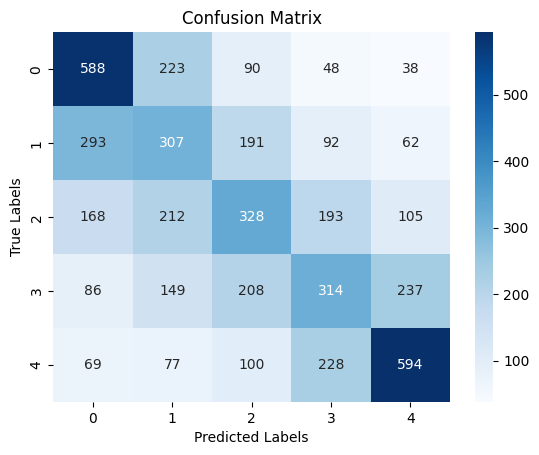

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: Great lyrics Four Stars
Predicted label: 5.0
True label: 4.0


Another Misclassified Review: Not impressed with this bag at all not. worth $30.00, yea right, what bass was used for its size and form. No padding to really speak off, since bag is over sized there's lots off room to for it to move around. If you are traveling around town this bag is a pain, its big it's loose and hangs up on everything. Yet has not ripped yet, looks a little worn all ready. No, there are better for the price, your paying for the art work.
Predicted label: 4.0
True label: 3.0


### Random Forest - 50 Trees

In [ ]:
rf_50 = RandomForestClassifier(n_estimators=50) # Random forest with 20 trees
rf_50.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred = rf_50.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.437


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.50      0.63      0.56       987
         2.0       0.33      0.29      0.31       945
         3.0       0.36      0.33      0.34      1006
         4.0       0.37      0.34      0.35       994
         5.0       0.57      0.58      0.57      1068

    accuracy                           0.44      5000
   macro avg       0.43      0.43      0.43      5000
weighted avg       0.43      0.44      0.43      5000



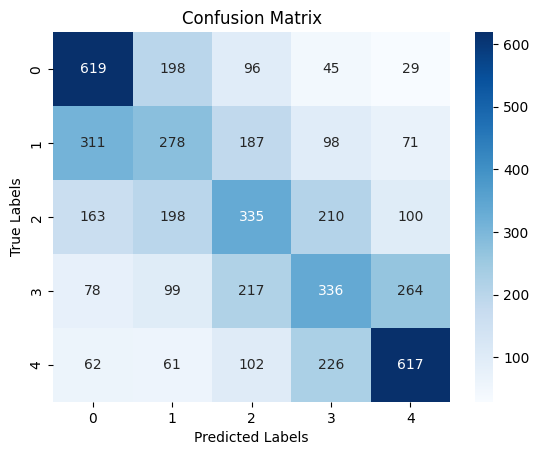

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: I play guitar, bass and violin.....and more. I have used many clip on tuners that are two and three times the cost and are just okay. In fact that may be saying too much.  I was really surprised at the Snark SN-5 tuner.  I found it very accurate.  I compared it to my Boss TU-2 tuner plugged in to the guitar and it was just as accurate and maybe a bit tighter.  I decided to adjust my guitar intonation with the Snark (no one would ever do this...this was a test) and it was very close to my stroboscope.  I plan on buying the higher quality Snark tuner that supposed to be even tighter.  Very impressed with this. If I can take my tuner pedal out of the loop and off my board, I will be happy.  These are cheap enough to buy one for each guitar so I don't have to move it around as I change guitars during performances. Snark SN-5
Predicted label: 3.0
True label: 4.0


Another Misclassified Review: Ok Four Stars
Predicted label: 3.0
True label: 4.0


### Random forest - 100 Trees

In [ ]:
rf_100 = RandomForestClassifier(n_estimators=100) # Random forest with 20 trees
rf_100.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_100.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4484


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.51      0.63      0.57       987
         2.0       0.35      0.31      0.33       945
         3.0       0.39      0.34      0.36      1006
         4.0       0.37      0.36      0.37       994
         5.0       0.57      0.58      0.58      1068

    accuracy                           0.45      5000
   macro avg       0.44      0.45      0.44      5000
weighted avg       0.44      0.45      0.44      5000



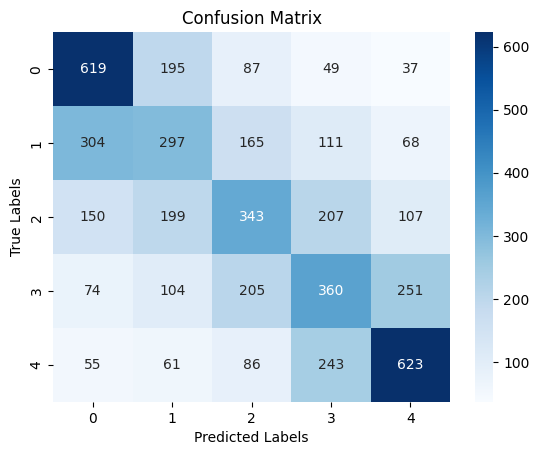

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: Great tool! The pin remover in the end is good for a 6 string but for a 12 string it could not lift the inner pins. But all else was as expected and hoped for. Handy Device
Predicted label: 4.0
True label: 5.0


Another Misclassified Review: Not as dry and firm oil paint, as I was lead to believe. Three Stars
Predicted label: 2.0
True label: 3.0


## Using bigrams for initializing weights to word embeddings

In [ ]:
cv = CountVectorizer(ngram_range=(1,2), max_features = 7000)
traindata = cv.fit_transform(df1['cleaned_review'])

In [ ]:
traindata.shape

(25000, 7000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(traindata, df1['overall'], test_size=0.2, shuffle = False)

### MultiNomial Naive Bayes

In [ ]:
MultinomialNaiveBayes = MultinomialNB()
MultinomialNaiveBayes.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = MultinomialNaiveBayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4536


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.56      0.61      0.58       987
         2.0       0.36      0.34      0.35       945
         3.0       0.41      0.24      0.30      1006
         4.0       0.38      0.38      0.38       994
         5.0       0.50      0.68      0.58      1068

    accuracy                           0.45      5000
   macro avg       0.44      0.45      0.44      5000
weighted avg       0.44      0.45      0.44      5000



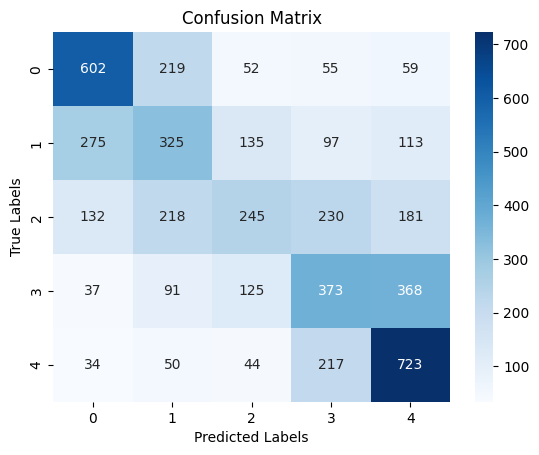

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: It does not sound good One Star
Predicted label: 4.0
True label: 1.0


Another Misclassified Review: Looks even better in person. Bit more brown which actually goes with what I am doing more so. Very happy with the quality of product. Arrived quickly. Looks even better in person
Predicted label: 5.0
True label: 4.0


### Gaussian Naive Bayes

In [ ]:
cv = CountVectorizer(ngram_range=(1,2), max_features = 2000)
traindata = cv.fit_transform(df1['cleaned_review'])

In [ ]:
traindata.shape

(25000, 2000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(traindata, df1['overall'], test_size=0.2, shuffle = False)

In [ ]:
GaussianNaiveBayes = GaussianNB()
GaussianNaiveBayes.fit(X_train.toarray(), y_train)

GaussianNB()

In [ ]:
y_pred = GaussianNaiveBayes.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.337


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.46      0.39      0.42       987
         2.0       0.32      0.18      0.23       945
         3.0       0.31      0.13      0.19      1006
         4.0       0.33      0.12      0.17       994
         5.0       0.31      0.82      0.45      1068

    accuracy                           0.34      5000
   macro avg       0.35      0.33      0.29      5000
weighted avg       0.35      0.34      0.30      5000



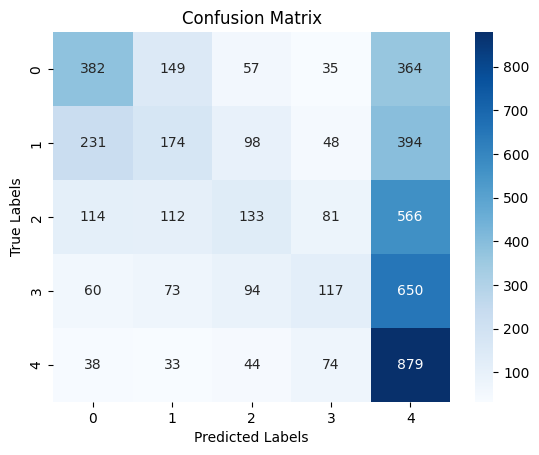

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: This is a very soft, beautiful yarn.  I'd give it 5 stars except that it is very prone to tangling as you work. Nice yarn.
Predicted label: 5.0
True label: 4.0


Another Misclassified Review: I received 2 only ordered one.  Do not want to get double charged and how do I return the extra one. I received 2 only ordered one. Do not want ...
Predicted label: 5.0
True label: 4.0


In [ ]:
cv = CountVectorizer(ngram_range=(1,2), max_features = 7000)
traindata = cv.fit_transform(df1['cleaned_review'])

In [ ]:
traindata.shape

(25000, 7000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(traindata, df1['overall'], test_size=0.2, shuffle = False)

### Decision Tree - Entropy

In [ ]:
dt_entropy = DecisionTreeClassifier(criterion='entropy') # Decision tree with entropy criterion
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = dt_entropy.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3546


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.44      0.44      0.44       987
         2.0       0.28      0.26      0.27       945
         3.0       0.29      0.29      0.29      1006
         4.0       0.29      0.31      0.30       994
         5.0       0.47      0.46      0.46      1068

    accuracy                           0.35      5000
   macro avg       0.35      0.35      0.35      5000
weighted avg       0.36      0.35      0.35      5000



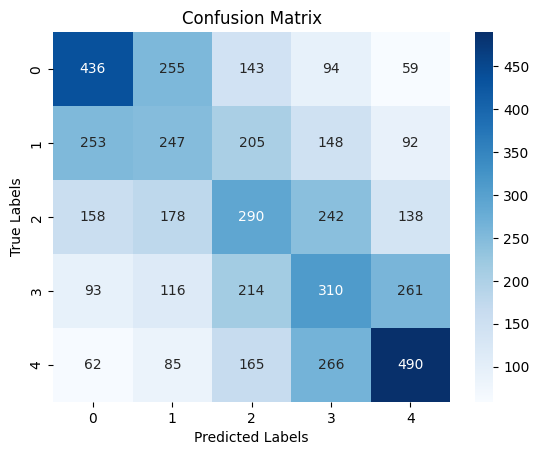

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: I ordered the wrong size so it was my fault. A friend needed that size so I gave to her check befoer you order
Predicted label: 4.0
True label: 3.0


Another Misclassified Review: Love these scissors because of size and sharpness.  Great for cutting small pieces. Be careful through, the points are also very sharp.  I've dropped them and found them standing on point in the floor! ...not for children. Tiny and very sharp!
Predicted label: 4.0
True label: 5.0


### Decision Tree - Gini

In [ ]:
dt_gini = DecisionTreeClassifier(criterion='gini') # Decision tree with gini criterion
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt_gini.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3708


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.46      0.46      0.46       987
         2.0       0.30      0.28      0.29       945
         3.0       0.28      0.29      0.29      1006
         4.0       0.31      0.33      0.32       994
         5.0       0.50      0.48      0.49      1068

    accuracy                           0.37      5000
   macro avg       0.37      0.37      0.37      5000
weighted avg       0.37      0.37      0.37      5000



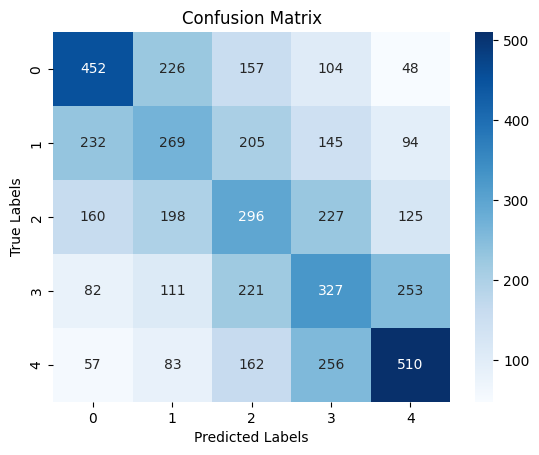

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: Great product. Four Stars
Predicted label: 5.0
True label: 4.0


Another Misclassified Review: holds 50 airbrush paint set thinner and cleaner, very sturdy Five Stars
Predicted label: 3.0
True label: 5.0


### Random Forest - 20 trees

In [ ]:
rf_20 = RandomForestClassifier(n_estimators=20) # Random forest with 20 trees
rf_20.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
y_pred = rf_20.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4166


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.50      0.60      0.54       987
         2.0       0.31      0.27      0.29       945
         3.0       0.36      0.31      0.33      1006
         4.0       0.33      0.33      0.33       994
         5.0       0.54      0.55      0.55      1068

    accuracy                           0.42      5000
   macro avg       0.41      0.41      0.41      5000
weighted avg       0.41      0.42      0.41      5000



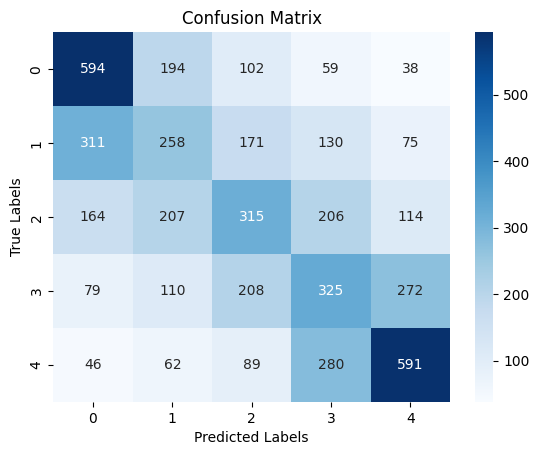

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: Believe me folks,just because this game has the Williams name on it doesn't mean it is worth owning. The gameplay,graphics and physics make this game all but unplayable. This is without a doubt the second worst pinball game I have ever played. The first worst being a Pro-Pinball title that was a top-down view with only the immediate area of the ball being visable. deceptive name
Predicted label: 1.0
True label: 2.0


Another Misclassified Review: This game is so cool I did not like the first one but after hearing this one was good I gave it a try and have been playing it since it's a must have I like surfing on cars and airplanes really fun so much to do it's what gta needed fun it had a good story but no fun this game seems to include a fairly good story but compensates it with fun. Saints row 2 awesomeness.
Predicted label: 4.0
True label: 5.0


### Random Forest - 50 trees

In [ ]:
rf_50 = RandomForestClassifier(n_estimators=50) # Random forest with 20 trees
rf_50.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred = rf_50.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4302


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.49      0.61      0.55       987
         2.0       0.34      0.30      0.32       945
         3.0       0.38      0.33      0.36      1006
         4.0       0.34      0.33      0.34       994
         5.0       0.55      0.56      0.56      1068

    accuracy                           0.43      5000
   macro avg       0.42      0.43      0.42      5000
weighted avg       0.42      0.43      0.42      5000



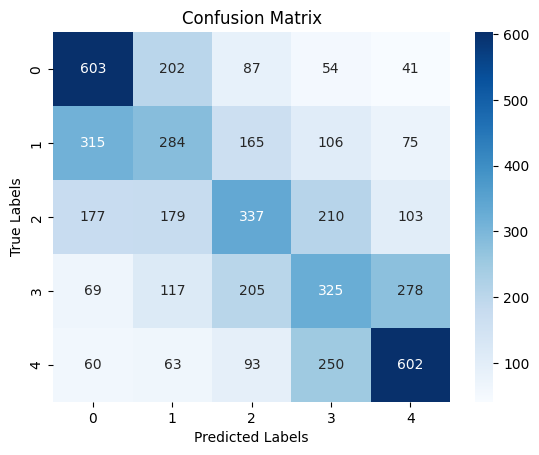

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: I really enjoy this song.  How can you go wrong with "Hell Yeah!!!" Four Stars
Predicted label: 5.0
True label: 4.0


Another Misclassified Review: It is decent and small size. Ehh
Predicted label: 1.0
True label: 3.0


### Random Forest - 100 trees

In [ ]:
rf_100 = RandomForestClassifier(n_estimators=100) # Random forest with 20 trees
rf_100.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_100.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4306


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.50      0.60      0.54       987
         2.0       0.32      0.28      0.30       945
         3.0       0.37      0.31      0.34      1006
         4.0       0.36      0.36      0.36       994
         5.0       0.55      0.59      0.57      1068

    accuracy                           0.43      5000
   macro avg       0.42      0.43      0.42      5000
weighted avg       0.42      0.43      0.42      5000



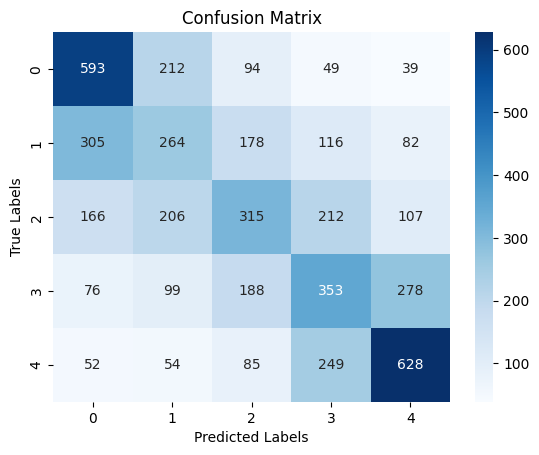

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])

Misclassified Review: Honestly, I am not sure what all the hype is about. This filament printed fine at 220C, nice surface look, but terrible mechanical properties... Heat treated it for 60 minutes at 265F, warped and shrunk a little as to be expected I suppose and was not terribly bad, but I was shocked at its really awful mechanical properties. Really what's the point of a carbon fiber part that is more brittle than regular PLA? Snaps clean through with very little force applied, much less than it would take to snap the equivalent PLA part. Not sure what the premium price is for? Maybe bragging rights? It fails to provide any real value and has a huge cost in terms of the expensive nozzles needed to resist the wear. Not to mention risk of health problems from carbon fiber particles. I can see absolutely no practical benefit unless you like brag you printed stuff in carbon fiber. I'll probably finish the spool out just to see if I can find some light at the end of this bleak tunnel, b

## Using trigrams for initializing weights to word embeddings

In [ ]:
cv = CountVectorizer(ngram_range=(1,3), max_features = 10000)
traindata = cv.fit_transform(df1['cleaned_review'])

In [ ]:
traindata.shape

(25000, 10000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(traindata, df1['overall'], test_size=0.2, shuffle = False)

### MultiNomial Naive Bayes

In [ ]:
MultinomialNaiveBayes = MultinomialNB()
MultinomialNaiveBayes.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = MultinomialNaiveBayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4508


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.55      0.60      0.58       987
         2.0       0.35      0.36      0.36       945
         3.0       0.42      0.21      0.28      1006
         4.0       0.38      0.38      0.38       994
         5.0       0.50      0.68      0.58      1068

    accuracy                           0.45      5000
   macro avg       0.44      0.45      0.43      5000
weighted avg       0.44      0.45      0.44      5000



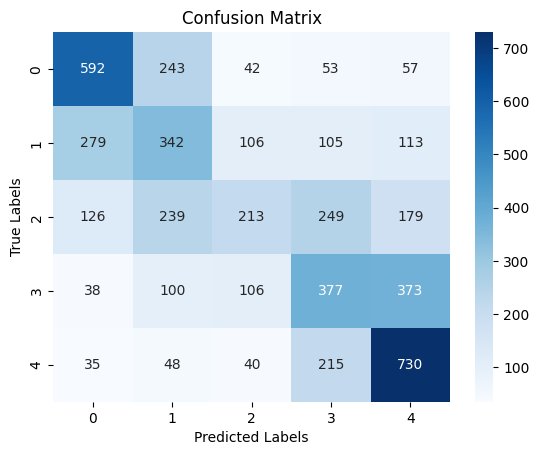

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: Downloaded very easily.  Good quality playback on my computer and it was a good price for a single mp3 and burned easily. Great
Predicted label: 5.0
True label: 4.0


Another Misclassified Review: This is like a workout video.  Love how this game/ fitness game personalizes to you.  It takes you through an initial workout profile to see where your fitness is currently.  It also asks what work out equipment you have on hand (ex. hand weights, balance ball, etc), and then customizes the works outs to only include what you have. I was so sore after my 1st workout.  Last night I did the yoga which was great.  Some of the reviews mentioned it is frustrating because the game doesn't continue to say the movements, which I understand; however, the game does the yoga poses multiple times and it does walk you through the 1st time.

I do recommend being familiar with standard yoga poses because it will help you to follow along easier.  There is a tutorial. If you aren't into 

### Gaussian Naive Bayes

In [ ]:
cv = CountVectorizer(ngram_range=(1,3), max_features = 2000)
traindata = cv.fit_transform(df1['cleaned_review'])

In [ ]:
traindata.shape

(25000, 2000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(traindata, df1['overall'], test_size=0.2, shuffle = False)

In [ ]:
GaussianNaiveBayes = GaussianNB()
GaussianNaiveBayes.fit(X_train.toarray(), y_train)

GaussianNB()

In [ ]:
y_pred = GaussianNaiveBayes.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3374


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.46      0.39      0.42       987
         2.0       0.32      0.19      0.24       945
         3.0       0.31      0.13      0.18      1006
         4.0       0.33      0.12      0.18       994
         5.0       0.31      0.82      0.45      1068

    accuracy                           0.34      5000
   macro avg       0.35      0.33      0.29      5000
weighted avg       0.35      0.34      0.30      5000



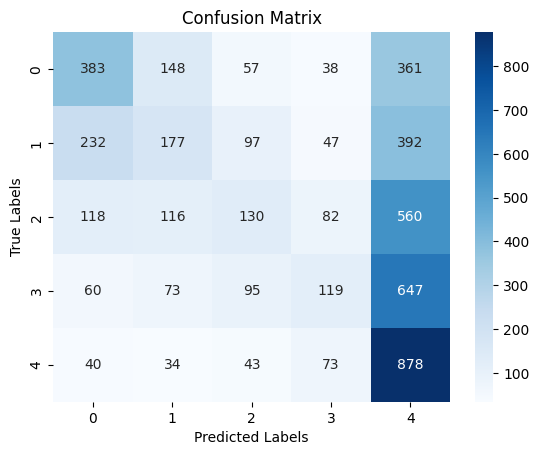

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: I definitely have to give this headset 5 stars based on the overall quality for price paid.  I have always bought the high end headsets for my son and they always ended up broken so I decided to go for a cheaper pair and give it a go.  I am extremely pleased with the durable design and the sound quality of the headset.  The microphone works great for him to interact online while gaming on his Xbox 360.  The headset provides much comfort as well for endless hours of gaming with padded ears.  I definitely recommend these to anyone in the market for a set and not wanting to waste paying the high cost for other brands that always end up broken a few months later. Grrat Quality and Comfort At A Fraction of the Cost
Predicted label: 4.0
True label: 5.0


Another Misclassified Review: Product sucks paid for 2 and 1 item was incomplete missing nut and washer. Two Stars
Predicted label: 5.0
True label: 2.0


In [ ]:
cv = CountVectorizer(ngram_range=(1,3), max_features = 10000)
traindata = cv.fit_transform(df1['cleaned_review'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(traindata, df1['overall'], test_size=0.2, shuffle = False)

### Decision Tree - Entropy

In [ ]:
dt_entropy = DecisionTreeClassifier(criterion='entropy') # Decision tree with entropy criterion
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = dt_entropy.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3554


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.43      0.43      0.43       987
         2.0       0.28      0.28      0.28       945
         3.0       0.28      0.28      0.28      1006
         4.0       0.30      0.32      0.31       994
         5.0       0.48      0.46      0.47      1068

    accuracy                           0.36      5000
   macro avg       0.35      0.35      0.35      5000
weighted avg       0.36      0.36      0.36      5000



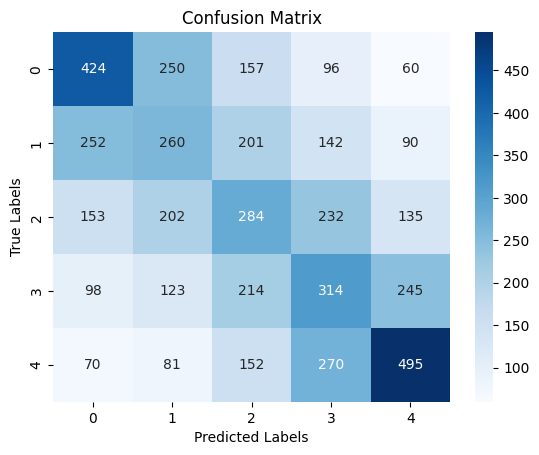

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: I received my package quickly, but found that instead of 40--18 mm washers, there were only six.  And 65 washers of the wrong size (14mm). Also, two of the magnetic clasps were defective.  The rest are fine, and the magnets seem plenty strong. But with the wrong size washers, they are unusable.  I contacted Amazon and they immediately offered to replace them. I will update once I receive my replacement with all the correct parts. Wrong size washers and two defective clasps
Predicted label: 1.0
True label: 2.0


Another Misclassified Review: Speaking as a huge fan of the original and Thousand-Year Door, who then played Sticker Star and may have let out a tear or two of frustration and disappointment over its awfulness, I was hesitant to try this new installment. I didn't want to open my heart up only to be hurt again. This is... better than the last. A bit. The story doesn't suck. The mechanics are basically just as bad and almost identical. The stupid stickers are

### Decision Tree - Gini

In [ ]:
dt_gini = DecisionTreeClassifier(criterion='gini') # Decision tree with gini criterion
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt_gini.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3728


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.46      0.47      0.47       987
         2.0       0.31      0.29      0.30       945
         3.0       0.29      0.31      0.30      1006
         4.0       0.30      0.31      0.30       994
         5.0       0.49      0.48      0.48      1068

    accuracy                           0.37      5000
   macro avg       0.37      0.37      0.37      5000
weighted avg       0.37      0.37      0.37      5000



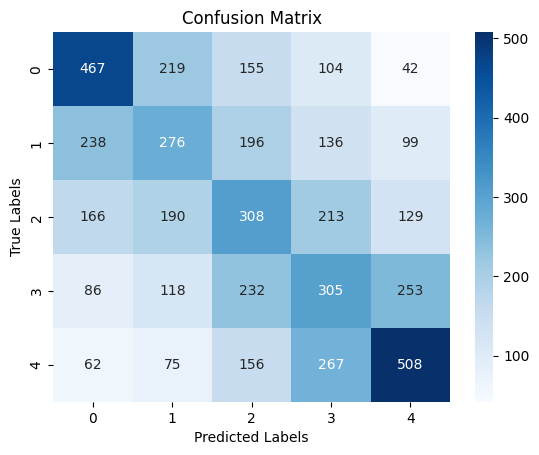

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: Soft and precise strings. Not out of tune even after playing too much Best strings
Predicted label: 2.0
True label: 5.0


Another Misclassified Review: did not fit my guitar the only piece i could use was the toggle piece product was not made bad I'll use it on a project guitar instead was cheap to buy so im not to upset did not fit
Predicted label: 1.0
True label: 2.0


### Random Forest - 20 trees

In [ ]:
rf_20 = RandomForestClassifier(n_estimators=20) # Random forest with 20 trees
rf_20.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
y_pred = rf_20.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4164


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.48      0.61      0.54       987
         2.0       0.29      0.26      0.28       945
         3.0       0.36      0.35      0.35      1006
         4.0       0.34      0.30      0.32       994
         5.0       0.56      0.55      0.55      1068

    accuracy                           0.42      5000
   macro avg       0.41      0.41      0.41      5000
weighted avg       0.41      0.42      0.41      5000



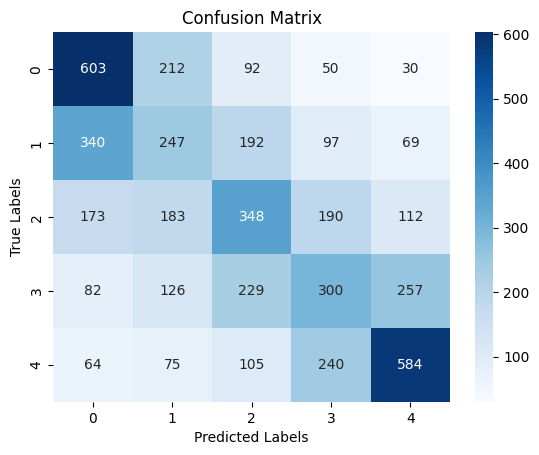

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: All the pics for this item show that the sensor has a metal probe, however the one I received has a plastic probe that looks like it would snap off just by looking at it.  Appears that they changed the design (but they need to update their pics and descriptions), I would not buy it had I of known.  Thankfully Amazon has a good return policy. The BLTouch I received has a plastic probe (pic show it with metal)
Predicted label: 1.0
True label: 2.0


Another Misclassified Review: I don't really know how to judge this product as it did not fit my Les Paul. It was way too big. I don't really know how to judge this product as ...
Predicted label: 1.0
True label: 3.0


### Random Forest - 50 trees

In [ ]:
rf_50 = RandomForestClassifier(n_estimators=50) # Random forest with 20 trees
rf_50.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred = rf_50.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4276


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.51      0.61      0.56       987
         2.0       0.31      0.27      0.29       945
         3.0       0.37      0.34      0.36      1006
         4.0       0.34      0.34      0.34       994
         5.0       0.55      0.56      0.56      1068

    accuracy                           0.43      5000
   macro avg       0.42      0.42      0.42      5000
weighted avg       0.42      0.43      0.42      5000



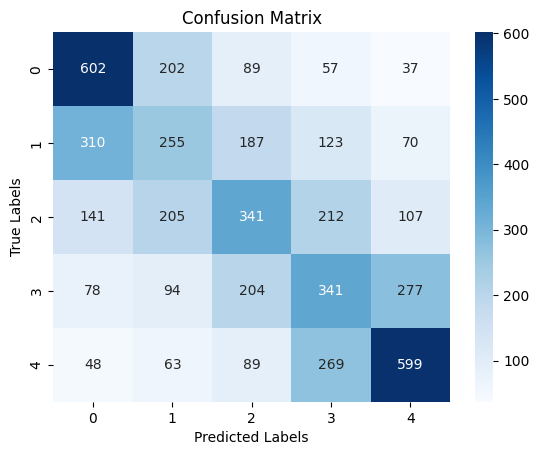

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: Love it love just as good as my Metal Zone...cheap and very nice tone could not be happier :) Damn good deal...
Predicted label: 4.0
True label: 5.0


Another Misclassified Review: I'm really happy with the guide - for newbies like me, the guide is the metal thing sticking out on the right side of the picture. This will come in handy with my sewing/quilting projects.

I'm taking off two stars because this sale is only for the guide - it does NOT also include the presser foot like the ad says. $10 just for the guide alone is kind of a high price, but I haven't seen it for sale anywhere else. I wish the listing had been more clear, but the did ship everything out quickly. Misleading ad: this is ONLY for the guide
Predicted label: 2.0
True label: 3.0


### Random Forest - 100 trees

In [ ]:
rf_100 = RandomForestClassifier(n_estimators=100) # Random forest with 20 trees
rf_100.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_100.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4392


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.51      0.63      0.57       987
         2.0       0.34      0.30      0.32       945
         3.0       0.36      0.32      0.34      1006
         4.0       0.37      0.35      0.36       994
         5.0       0.55      0.58      0.57      1068

    accuracy                           0.44      5000
   macro avg       0.43      0.44      0.43      5000
weighted avg       0.43      0.44      0.43      5000



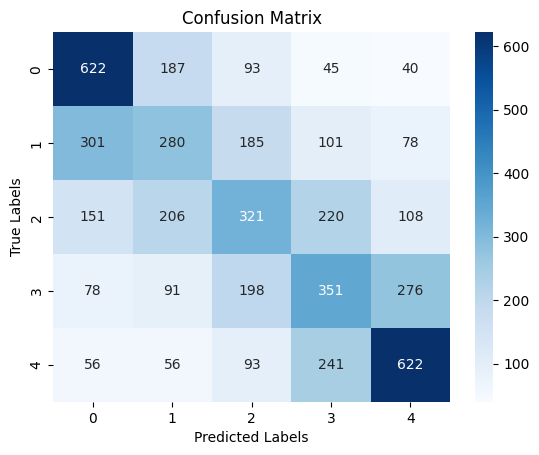

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: the game it self is great but the controls are HORRIBLE Two Stars
Predicted label: 3.0
True label: 2.0


Another Misclassified Review: Tiny, tiny packet! 1 x 1 inch packet! Tiny 1 inch packet!
Predicted label: 2.0
True label: 1.0


# Binary classification of ratings

In [ ]:
category_mapping = {
    1.0: '0',
    2.0: '0',
    3.0: '1',
    4.0: '1',
    5.0: '1',
}

df1['overall'] =df1['overall'].replace(category_mapping)

## Using CountVectorizer to initialize weights for word embeddings

In [ ]:
vectorizer = CountVectorizer(max_features=10000)

In [ ]:
X = vectorizer.fit_transform(df1['cleaned_review'])

In [ ]:
from sklearn.model_selection import train_test_split

# Assume X and y are your features and labels
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df1['overall'], test_size=0.2, shuffle = False)

### MultiNomial Naive Bayes

In [ ]:
MultinomialNaiveBayes = MultinomialNB()
MultinomialNaiveBayes.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = MultinomialNaiveBayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7858


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      1932
           1       0.81      0.86      0.83      3068

    accuracy                           0.79      5000
   macro avg       0.78      0.76      0.77      5000
weighted avg       0.78      0.79      0.78      5000



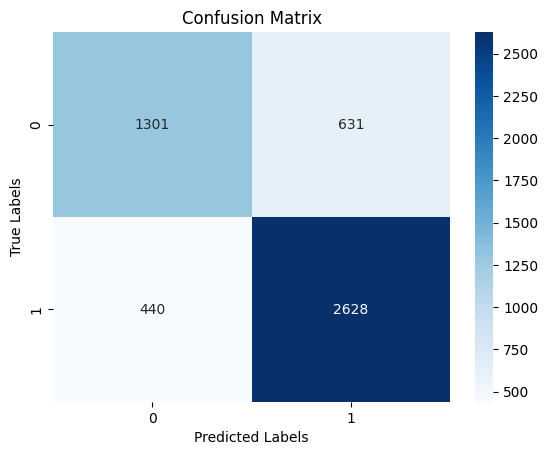

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
import random

misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: These strings sound nice on my Kala KA-B baritone ukulele, but in no time at all the wound strings start to unravel at the upper frets. I've read that this is just a normal thing with wound baritone strings, but I don't buy it. Or at least I won't in the future. The last G string I replaced began unraveling in a week. After two weeks you could not bear to slide your finger across the string. I now have an Aquila #73U Red unwound G string and it sounds great. We'll see how long it lasts.

Besides the Kala I have two Pono baritones that come with Koolau strings. No problem there, these strings just go on and on. No unraveling.

I could not locate either the Koolau baritone string sets or Aquila single unwound baritone strings here on Amazon. I got mine from Elderly Instruments. Wound Strings Unravel Way Too Quickly
Predicted label: 1
True label: 0


Another Misclassified Review: Nothing to complain about except this was the easiest game I have ever played. Its a gre

### Gaussian NaiveBayes

In [ ]:
vectorizer = CountVectorizer(max_features=2500)

In [ ]:
X = vectorizer.fit_transform(df1['cleaned_review'])

In [ ]:
from sklearn.model_selection import train_test_split

# Assume X and y are your features and labels
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df1['overall'], test_size=0.2, shuffle = False)

In [ ]:
GaussianNaiveBayes = GaussianNB()
GaussianNaiveBayes.fit(X_train.toarray(), y_train)

GaussianNB()

In [ ]:
y_pred = GaussianNaiveBayes.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6996


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.52      0.57      1932
           1       0.73      0.81      0.77      3068

    accuracy                           0.70      5000
   macro avg       0.68      0.67      0.67      5000
weighted avg       0.69      0.70      0.69      5000



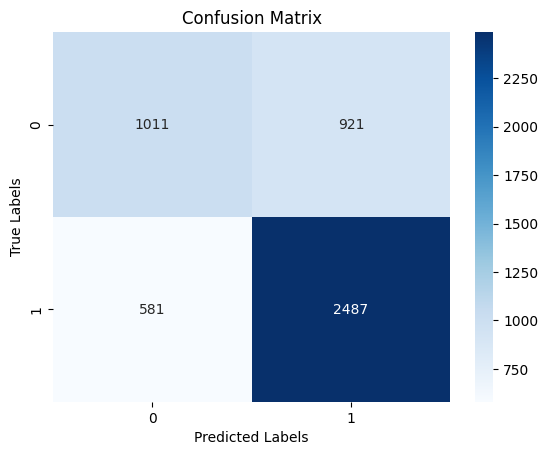

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: This is a nice color and is not fussy to print.  The filament is a little rough though and might cause problems in cheaper hot ends.  On the other hand, the extruder has no problems pushing it through a Bowden tube. Came fast, works well
Predicted label: 0
True label: 1


Another Misclassified Review: Works great to hide thinning hair patches. Just shake on the areas that are thinning. Works by concealing balding scalp areas - the micro fibers lay on top of your scalp darkening the area so your otherwise shiny noggin doesn't show thru the thinning hair. Also somewhat thickens the appearance of hair. Withstands wind pretty well & moisture to some degree. Washes out easily with shampoo and water. Will also rub off on your hands if you run your hands thru your hair. Is purely a cosmetic fix to hiding hair loss. For it to work well, it's necessary for there to be some hair, even if it is fine and short, present to which the fibers can adhere and fill in. Best for conc

In [ ]:
vectorizer = CountVectorizer(max_features=10000)

In [ ]:
X = vectorizer.fit_transform(df1['cleaned_review'])

In [ ]:
from sklearn.model_selection import train_test_split

# Assume X and y are your features and labels
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df1['overall'], test_size=0.2, shuffle = False)

### Decision Tree - entroy

In [ ]:
dt_entropy = DecisionTreeClassifier(criterion='entropy') # Decision tree with entropy criterion
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = dt_entropy.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7188


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.63      0.63      1932
           1       0.77      0.78      0.77      3068

    accuracy                           0.72      5000
   macro avg       0.70      0.70      0.70      5000
weighted avg       0.72      0.72      0.72      5000



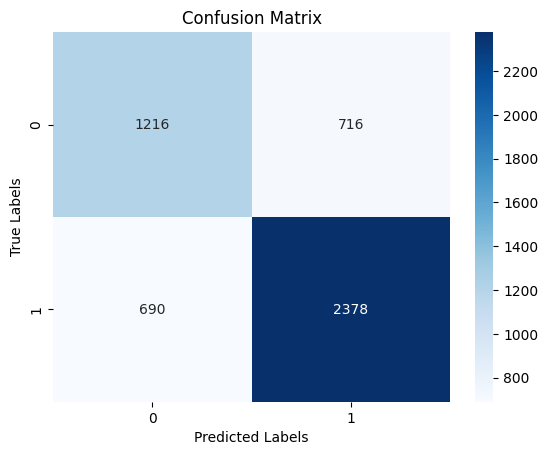

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: Let me say I LOVE the size and ease of reading this meter, so much so when I opened it I considered instantly ordering a 2nd unit.  I just got it today and my house is set at 72 degrees and stays 72 without a problem, I put a fresh (tested) AA duracell battery into this and set in a corner away from vent and window light, it's sat here for just over 2 hours yet still reads 80 degrees.

I can see it being off a degree or two or even 3 maybe but reading 80 in a 71 degree room is quite odd, I even brought my outdoor thermometer inside and it reads 72 solid as a rock, so I am kinda bummed/stumped as to why this still reads 80 vs the actual room temperature. LOVE the look and easy to read screen on this, but my room is set at 72 and the meter just reads 80 not in sun or by vent ;(
Predicted label: 1
True label: 0


Another Misclassified Review: Unfortunately I cannot get this game to start on my system. The screen is black. I have already spent 20 minutes looking for p

### Decision Tree - Gini

In [ ]:
dt_gini = DecisionTreeClassifier(criterion='gini') # Decision tree with gini criterion
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt_gini.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7138


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.64      0.63      1932
           1       0.77      0.76      0.77      3068

    accuracy                           0.71      5000
   macro avg       0.70      0.70      0.70      5000
weighted avg       0.71      0.71      0.71      5000



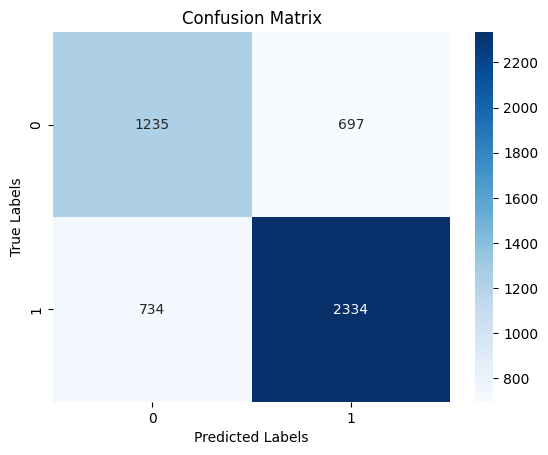

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])


Misclassified Review: no coment no
Predicted label: 1
True label: 0


Another Misclassified Review: it took a while to get here and while it works it wasn't that simple to hook up and the kids really don't seem interested in using it. Works good once installed (china)
Predicted label: 1
True label: 0


### Random Forest - 20 Trees

In [ ]:
rf_20 = RandomForestClassifier(n_estimators=20) # Random forest with 20 trees
rf_20.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
y_pred = rf_20.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7692


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1932
           1       0.82      0.80      0.81      3068

    accuracy                           0.77      5000
   macro avg       0.76      0.76      0.76      5000
weighted avg       0.77      0.77      0.77      5000



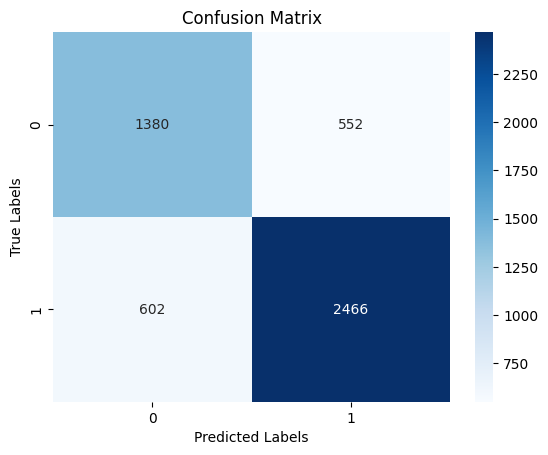

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])

Misclassified Review: I have had this item for over a month now. Unlike others, I did not see any sharp wood splinters or a super cheap worthless item. It is nothing spectacular, but it is good to practice fingering chords and notes. No, you cannot play it like a guitar- but that is not what it was designed for. There is value in this for learning and for muscle memory training, which it why it exists.

There are some limited adjustments for string tension under the plastic cover if the strings are too loose for your liking if you have a small screw driver and use the included hex wrench. The strings are real steel string segments, but they are not 'tunable'.

Overall, it is helpful for learning chords when you cannot carry your guitar around with you. Helpful tool
Predicted label: 0
True label: 1


Another Misclassified Review: I'm enjoying the game but am curious what happened to the redemption code I was suppose to receive with my pre order purchase. Rayman Legends is a hit
Predicte

### Random Forest - 50 trees


In [ ]:
rf_50 = RandomForestClassifier(n_estimators=50) # Random forest with 20 trees
rf_50.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred = rf_50.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7772


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      1932
           1       0.81      0.83      0.82      3068

    accuracy                           0.78      5000
   macro avg       0.77      0.76      0.76      5000
weighted avg       0.78      0.78      0.78      5000



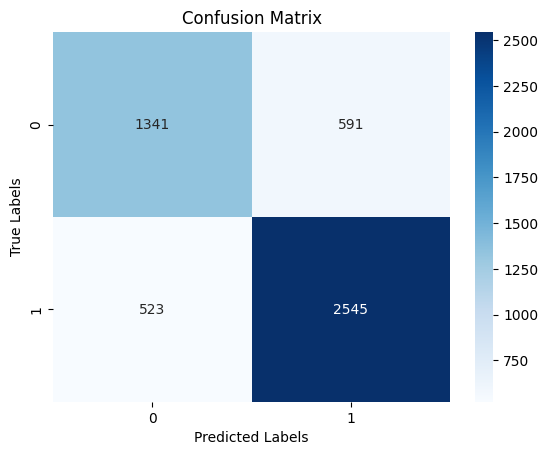

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])

Misclassified Review: Before buying this item, be aware that the D-Pad will be loose! It is caused because the opening for the D-pad is just to big for it to fit, and it is kind of annoying, other than that, it is a good case. Not so please about this product, beware of the D-pad!
Predicted label: 0
True label: 1


Another Misclassified Review: I actually replaced a BOSS TR2 with this pedal. Does everything it is supposed to do without the "perceived" (that's was they say) volume loss typical of many tremolo pedals. If it's perceived, then how do you explain how good this sounds? I have since had the pedal rehoused in a metal enclosure with a better switch because I was scared of breaking its plastic housing when switching it on and off. Best tremolo pedal for the money
Predicted label: 0
True label: 1


### Random Forest - 100 trees

In [ ]:
rf_100 = RandomForestClassifier(n_estimators=100) # Random forest with 20 trees
rf_100.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_100.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.791


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1932
           1       0.82      0.84      0.83      3068

    accuracy                           0.79      5000
   macro avg       0.78      0.78      0.78      5000
weighted avg       0.79      0.79      0.79      5000



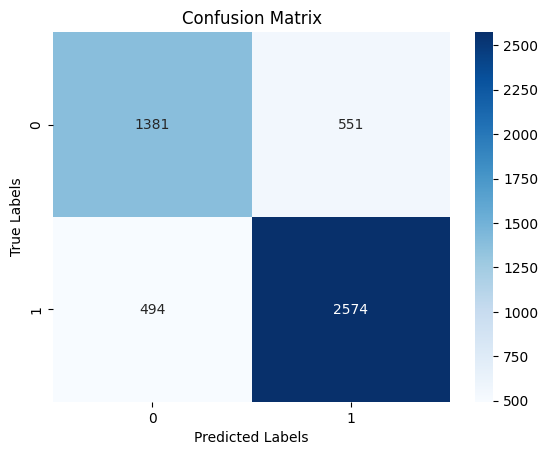

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])

Misclassified Review: My new favorite string. I was having issues with heavy bends on my 10's. This hybrid pack is the equivalent of 9s on the three high strings and 10's on the lower three stings. My new favorite string. I was having issues with heavy bends ...
Predicted label: 0
True label: 1


Another Misclassified Review: Cheap build quality.  I expected better.  You can get better quality for a lower price (less than half) at MonoPrice.com. Cheaper Than Expected
Predicted label: 0
True label: 1


## Using Tf-Idf for weights initialization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=10000, stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(df1['cleaned_review'])

tfidf.shape

(25000, 10000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, df1['overall'], test_size=0.2, shuffle = False)

### Multinomial Naive Bayes

In [ ]:
MultinomialNaiveBayes = MultinomialNB()
MultinomialNaiveBayes.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = MultinomialNaiveBayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7816


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.57      0.67      1932
           1       0.77      0.92      0.84      3068

    accuracy                           0.78      5000
   macro avg       0.79      0.74      0.75      5000
weighted avg       0.79      0.78      0.77      5000



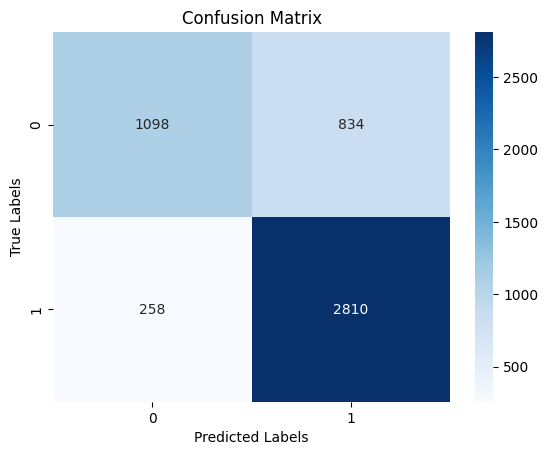

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: 1/6 cables arrived bad.  I would spend a little more and get nicer cables 1/6 cables arrived bad. I would spend a little more and get ...
Predicted label: 1
True label: 0


Another Misclassified Review: so so so so
Predicted label: 1
True label: 0


### Gausian Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=2000, stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(df1['cleaned_review'])

tfidf.shape

(25000, 2000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, df1['overall'], test_size=0.2, shuffle = False)

In [ ]:
GaussianNaiveBayes = GaussianNB()
GaussianNaiveBayes.fit(X_train.toarray(), y_train)

GaussianNB()

In [ ]:
y_pred = GaussianNaiveBayes.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.717


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.67      0.65      1932
           1       0.78      0.75      0.76      3068

    accuracy                           0.72      5000
   macro avg       0.70      0.71      0.71      5000
weighted avg       0.72      0.72      0.72      5000



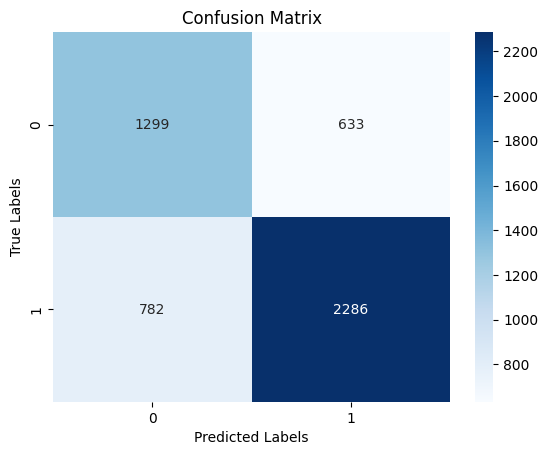

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])

Misclassified Review: I got this because it was cheap and people were really hyping it up, it's nothing fantastic. I have big hands and I've never had trouble with my controller. I added this to the controller I use the most but I wouldn't buy another one for my other controller. This is just something I guess for people who want to rest a finger on the controller I don't think its something you really need to have. Not as great as everyone claims but its not a bad item either.
Predicted label: 0
True label: 1


Another Misclassified Review: When I got this, I was so excited.  It makes a gallon.  So I put a gallon of cold water in a milk jug and proceeded to pour the powder in the small opening.  it started gelling up before I could get half in so I was squeezing and pushing it in.  Had it all over my hands.  I was afraid for a bit that I would glue my hands together.  Finally got as much in as I could.  Next, instructions said stir it well, so I shook and shook the container.  Then le

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=10000, stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(df1['cleaned_review'])

tfidf.shape

(25000, 10000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, df1['overall'], test_size=0.2, shuffle = False)

### Decision Tree - entropy

In [ ]:
dt_entropy = DecisionTreeClassifier(criterion='entropy') # Decision tree with entropy criterion
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = dt_entropy.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7202


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      1932
           1       0.77      0.78      0.77      3068

    accuracy                           0.72      5000
   macro avg       0.70      0.70      0.70      5000
weighted avg       0.72      0.72      0.72      5000



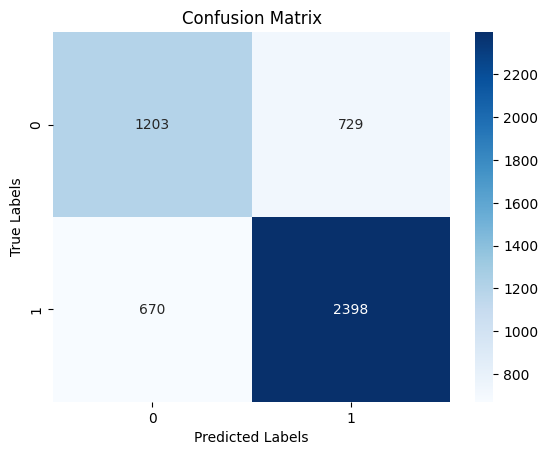

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: this game is garbage.  First of all the first scene where his team is fragged is terrible I rather have had them shot themselves because they were in this trash game.  Two more things what the **** is with the extensive swearing he like goes out of his way to swear after every kill and during every cutscene.  And my last point is what is the multiplayer and how do I ever get the terrible image of how bad it is out of my head.  For the love of whoever you worship do not buy this game. WOW someone take out the trash
Predicted label: 1
True label: 0


Another Misclassified Review: I'm not a fan of this brand of yarn, I won't buy it again, but that is just my personal preference. It snags and unravels a lot more that the yarn I am used to. Snags
Predicted label: 1
True label: 0


### Decision Tree - Gini

In [ ]:
dt_gini = DecisionTreeClassifier(criterion='gini') # Decision tree with gini criterion
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt_gini.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.723


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.62      0.63      1932
           1       0.77      0.79      0.78      3068

    accuracy                           0.72      5000
   macro avg       0.71      0.70      0.71      5000
weighted avg       0.72      0.72      0.72      5000



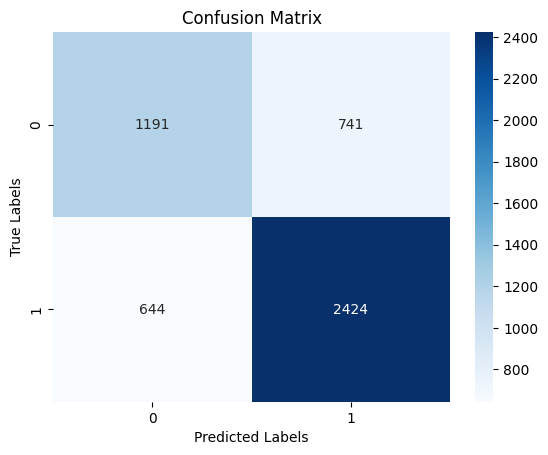

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: Something new for me so I think others will like it also Four Stars
Predicted label: 0
True label: 1


Another Misclassified Review: It is supposed to be a 36" length of neoprene sheet but it is so tightly rolled that only 33" was usable. I clamped the sheet between two boards for 48 hours and still the last 3 inches were not flat.

I also found that with neoprene contact cement this material would curl in both directions which also made it more difficult to get into position. This is specific to the way this sheet material was formulated as I have never had this problem in the past with many other rubber sheet products. Tough to get it into position when it curls up so terribly. Plan on 33 usable inches - does not play well with contact cement
Predicted label: 1
True label: 0


### Random Forest - 20 trees

In [ ]:
rf_20 = RandomForestClassifier(n_estimators=20) # Random forest with 20 trees
rf_20.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
y_pred = rf_20.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7738


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1932
           1       0.81      0.83      0.82      3068

    accuracy                           0.77      5000
   macro avg       0.76      0.76      0.76      5000
weighted avg       0.77      0.77      0.77      5000



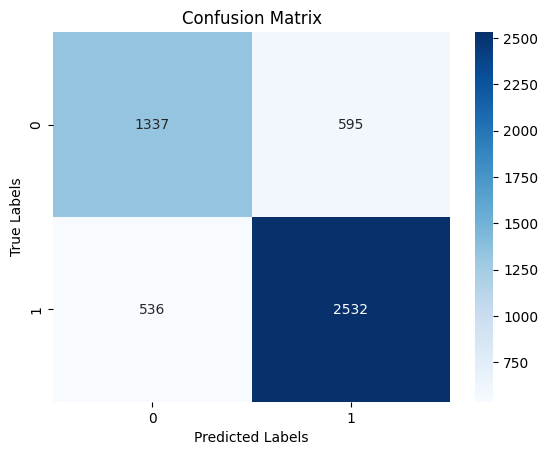

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: I was slightly disappointed in the quality of this product, but for the price I wasn't surprised. The stitching is a very long stitch and I was concerned that if the thread broke or caught on something the bag might come apart. The cover and sections inside the bag are made of cardboard with a paper like covering that looks like a faux fabric. Some of the surface of this paper was torn in spots where it had got caught under the stitches, and the cardboard in the corners was already loosing its shape. It appears the stitching holds the zippers to the cardboard dividers so if a stitch broke the stitching could pull out causing the zipper to come loose. To prevent this I reinforced all the stitching lines with craft glue that dries to a matte finish so it does not show. It makes the stitches rather brittle but I feel that is better than having them pull out or break. I am very happy with the color of the bag, it matches the picture well. I think it might be called re

### Random Forest - 50 Trees

In [ ]:
rf_50 = RandomForestClassifier(n_estimators=50) # Random forest with 20 trees
rf_50.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred = rf_50.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.794


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72      1932
           1       0.82      0.85      0.84      3068

    accuracy                           0.79      5000
   macro avg       0.78      0.78      0.78      5000
weighted avg       0.79      0.79      0.79      5000



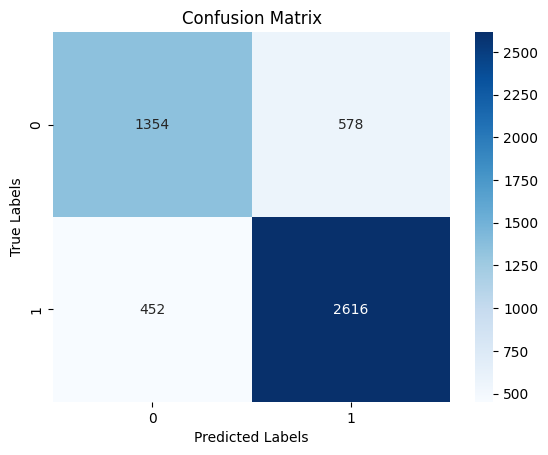

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: Works ok. Kinda loose but okay soso
Predicted label: 1
True label: 0


Another Misclassified Review: I love the Xbox One. My lower rating is because of these updated controllers.. I've been through 12 controllers and I still only have one that actually works like it should??? Xbox needs to find a better company to make these controllers; they are total crap... Controllers are Junk
Predicted label: 0
True label: 1


### Random forest - 100 Trees

In [ ]:
rf_100 = RandomForestClassifier(n_estimators=100) # Random forest with 20 trees
rf_100.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_100.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7904


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1932
           1       0.81      0.85      0.83      3068

    accuracy                           0.79      5000
   macro avg       0.78      0.77      0.78      5000
weighted avg       0.79      0.79      0.79      5000



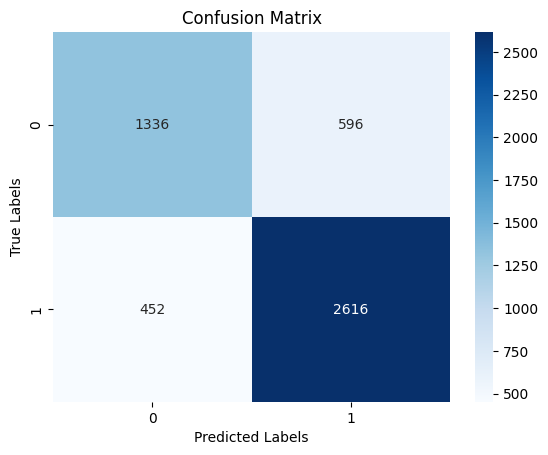

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: Does the job if you can stand the noise.  Noise was too annoying to bear and found a "quiet" solution. Xbox 360 Intercooler - Black
Predicted label: 1
True label: 0


Another Misclassified Review: Whole is too big for tuner handle. It hards to tight and loose. It doesn't fit for the Fender Stratocaster tuner. When you use this tool, it touched next the tuner handle. It doesn't fit.
Predicted label: 1
True label: 0


## Using bigrams for initializing weights to word embeddings

In [ ]:
cv = CountVectorizer(ngram_range=(1,2), max_features = 7000)
traindata = cv.fit_transform(df1['cleaned_review'])

In [ ]:
traindata.shape

(25000, 7000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(traindata, df1['overall'], test_size=0.2, shuffle = False)

### MultiNomial Naive Bayes

In [ ]:
MultinomialNaiveBayes = MultinomialNB()
MultinomialNaiveBayes.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = MultinomialNaiveBayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.797


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1932
           1       0.82      0.86      0.84      3068

    accuracy                           0.80      5000
   macro avg       0.79      0.78      0.78      5000
weighted avg       0.80      0.80      0.80      5000



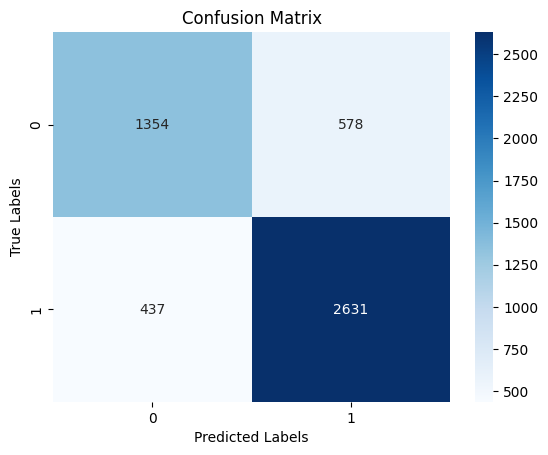

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: This is really just a poor rendition of 60's style pop.  It's not bad, but Deschenel's voice definately leaves something to be desired here. A totally forgettable track. At least it was free. meh
Predicted label: 0
True label: 1


Another Misclassified Review: I had high hopes for this.  I've been using an Alesis SR-16 for twenty years, so that's my perspective.  I'm not interesting in programming a song; I just want to hit a foot pedal and jam with my friends.  I"ve gone through most of the Boss machines and even the new Alesis and rejected them all for pretty much the same reasons: I want something quick and simple that sounds good for a number of varied songs.  If this sounds like you, read on.

First: picking a new beat is awkward and tedious.  You have to bend down, hit some buttons, scroll around and try to remember if you liked Rock 12 better than Rock 13.  Then you click to load it, watch it slowly load, then you dial or tap in a tempo.  The ancient Alesis

### Gaussian Naive Bayes

In [ ]:
cv = CountVectorizer(ngram_range=(1,2), max_features = 2000)
traindata = cv.fit_transform(df1['cleaned_review'])

In [ ]:
traindata.shape

(25000, 2000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(traindata, df1['overall'], test_size=0.2, shuffle = False)

In [ ]:
GaussianNaiveBayes = GaussianNB()
GaussianNaiveBayes.fit(X_train.toarray(), y_train)

GaussianNB()

In [ ]:
y_pred = GaussianNaiveBayes.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.721


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.54      0.60      1932
           1       0.74      0.84      0.79      3068

    accuracy                           0.72      5000
   macro avg       0.71      0.69      0.69      5000
weighted avg       0.72      0.72      0.71      5000



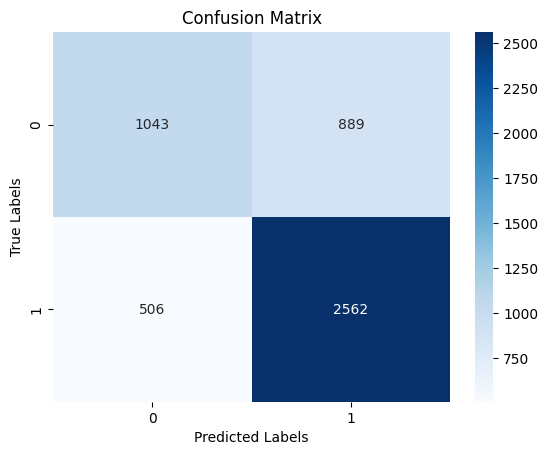

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: Pretty colors but do not purchase these for use with adult coloring books as advertised. The tips are far too wide for anything but broad filler work. Not for use with Adult Coloring Books
Predicted label: 1
True label: 0


Another Misclassified Review: Bad fifa 14 One Star
Predicted label: 1
True label: 0


In [ ]:
cv = CountVectorizer(ngram_range=(1,2), max_features = 7000)
traindata = cv.fit_transform(df1['cleaned_review'])

In [ ]:
traindata.shape

(25000, 7000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(traindata, df1['overall'], test_size=0.2, shuffle = False)

### Decision Tree - Entropy

In [ ]:
dt_entropy = DecisionTreeClassifier(criterion='entropy') # Decision tree with entropy criterion
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = dt_entropy.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7164


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.64      0.63      1932
           1       0.77      0.77      0.77      3068

    accuracy                           0.72      5000
   macro avg       0.70      0.70      0.70      5000
weighted avg       0.72      0.72      0.72      5000



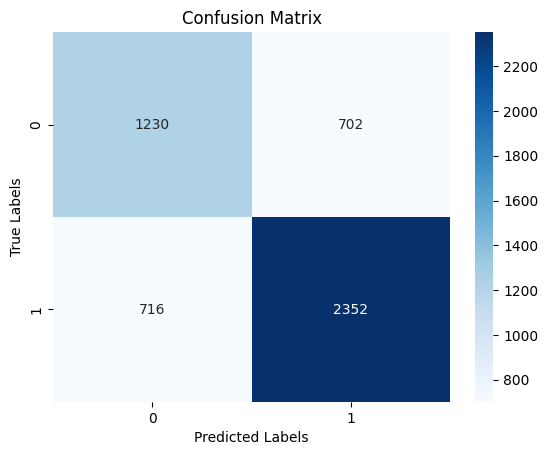

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: its ok not all the same have seen and used better for the same price its okay
Predicted label: 1
True label: 0


Another Misclassified Review: Does the job if you can stand the noise.  Noise was too annoying to bear and found a "quiet" solution. Xbox 360 Intercooler - Black
Predicted label: 1
True label: 0


### Decision Tree - Gini

In [ ]:
dt_gini = DecisionTreeClassifier(criterion='gini') # Decision tree with gini criterion
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt_gini.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7092


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.63      0.63      1932
           1       0.77      0.76      0.76      3068

    accuracy                           0.71      5000
   macro avg       0.69      0.70      0.69      5000
weighted avg       0.71      0.71      0.71      5000



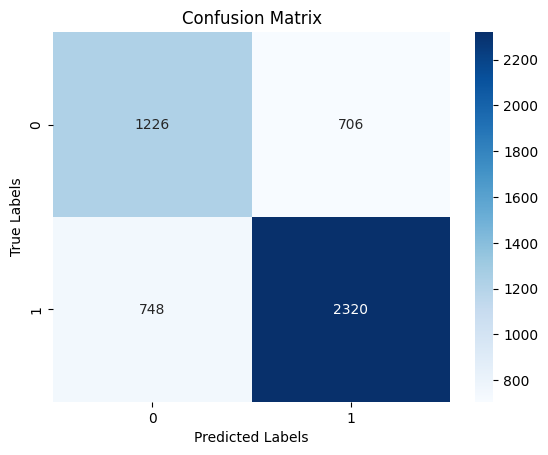

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: I have a nice Custom Shop Hummingbird that I elected not to have any electronics put in to it. I should have realized that meant no neck strap pin. (There is one at the base of the body.) I do a lot of recording of acoustic instruments, and for some song types that require a specific more aggressive strumming technique, I prefer to stand. The choice is to drill into the base of the neck and install a strap pin (like the Planet Waves Solid Brass Pin) or to try this strap tie. So...I did both. I have a Martin 12-string that I installed the strap pin and my Hummingbird has the Martin Strap Tie.
The Martin Strap Tie works as advertised. And so long as I am careful to insure that the strap connects properly to the Tie, I have confidence that my guitar will stay secure.
The strap pin works better. Here's why:
- the guitar has a better balance with your strap attached to the strap pins due to gravity pulling downward on the body of the guitar with your guitar strap in an

### Random Forest - 20 trees

In [ ]:
rf_20 = RandomForestClassifier(n_estimators=20) # Random forest with 20 trees
rf_20.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
y_pred = rf_20.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7682


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1932
           1       0.82      0.80      0.81      3068

    accuracy                           0.77      5000
   macro avg       0.76      0.76      0.76      5000
weighted avg       0.77      0.77      0.77      5000



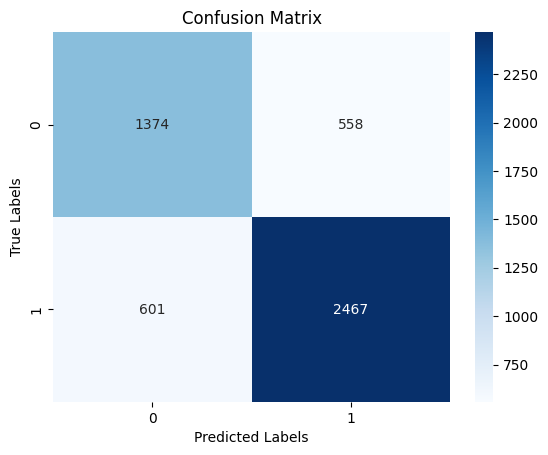

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: Hold up! Before you purchase this be aware that although it may look exactly like the original GBC lens these things scratch if you so much as breath on them. I used cleaning solution & a professional grade soft cloth on mine after I got a fingerprint on it - absolute cataclysm. Seeking another source. Zero scratch resistance
Predicted label: 1
True label: 0


Another Misclassified Review: it met my needs Four Stars
Predicted label: 0
True label: 1


### Random Forest - 50 trees

In [ ]:
rf_50 = RandomForestClassifier(n_estimators=50) # Random forest with 20 trees
rf_50.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred = rf_50.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7784


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1932
           1       0.81      0.83      0.82      3068

    accuracy                           0.78      5000
   macro avg       0.77      0.76      0.76      5000
weighted avg       0.78      0.78      0.78      5000



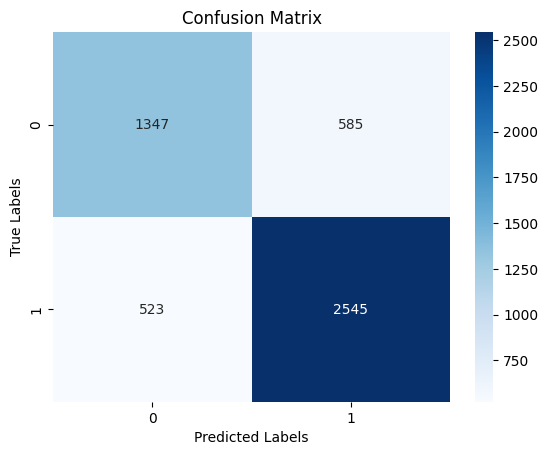

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: The game/guitar worked perfectly. I ended up getting Guitar Hero Live also. I was hoping I'd enjoy this as much as I liked the older version. But there's just not a big enough play list of songs that I like from artists/styles I enjoy. They really need to add more free songs instead of charging to make the slim default play list better.

If they could have had a playlist closer to that of Guitar Heroes Warriors of Rock and Rock Band 2 that would have made a difference. But again it also didn't do anything really new/different than the last offering.

I ended up selling my copy a few months after getting it. Luckily I didn't take much of a loss. I was hoping I'd enjoy this as much as I liked the older version
Predicted label: 1
True label: 0


Another Misclassified Review: Works fine.  Difficult to thread at first, but after doing it twice, I was a pro.  I am disappointed, though.  I thought it would do a cover hem stitch for knits.  I didn't realize all sergers di

### Random Forest - 100 trees

In [ ]:
rf_100 = RandomForestClassifier(n_estimators=100) # Random forest with 20 trees
rf_100.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_100.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7888


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1932
           1       0.82      0.83      0.83      3068

    accuracy                           0.79      5000
   macro avg       0.78      0.78      0.78      5000
weighted avg       0.79      0.79      0.79      5000



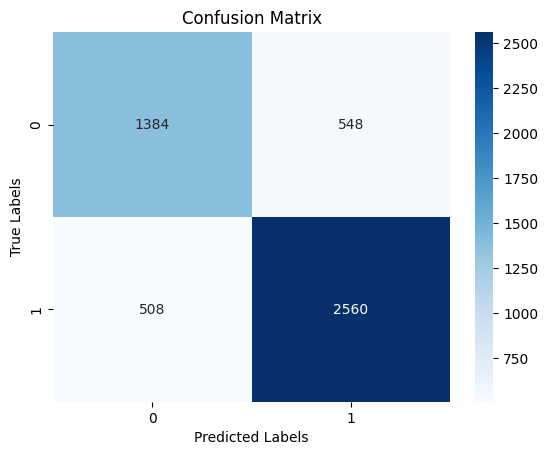

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])

Misclassified Review: These beads look great!  So affordable.  I received them in a couple of weeks as opposed to the estimated month.  You can't go wrong with these. I've included a picture of the bracelet I made with them. Great skull beads
Predicted label: 0
True label: 1


Another Misclassified Review: The trigger add-ons are wonderful.  I can't tell you enough about how much of a difference they made for me.  The PS3 controller's L2 and R2 buttons were probably the worst button designs ever.  I disliked them more then the stupid gamecube's controller buttons.  When I attached the trigger add-ons it made the controller feel like it should of been made.  The armor is ok but I think the controller looks better without it.  These are a must have if you like shooter games because it just feels so weird shooting with the L1 and R1 buttons.  Also, I have seen in other reviews that some people are having problems with their triggers popping off.  I have not had this problem.  I play A LOT

## Using trigrams for initializing weights to word embeddings

In [ ]:
cv = CountVectorizer(ngram_range=(1,3), max_features = 10000)
traindata = cv.fit_transform(df1['cleaned_review'])

In [ ]:
traindata.shape

(25000, 10000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(traindata, df1['overall'], test_size=0.2, shuffle = False)

### MultiNomial Naive Bayes

In [ ]:
MultinomialNaiveBayes = MultinomialNB()
MultinomialNaiveBayes.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = MultinomialNaiveBayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8002


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1932
           1       0.83      0.85      0.84      3068

    accuracy                           0.80      5000
   macro avg       0.79      0.79      0.79      5000
weighted avg       0.80      0.80      0.80      5000



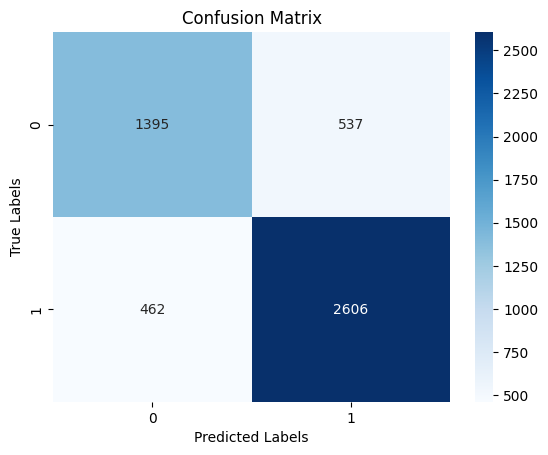

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: THEY ARE ok, TWO OF THE LEAK Three Stars
Predicted label: 0
True label: 1


Another Misclassified Review: I consider myself to be a casual gamer.  That is, I want the fun experience of playing the game, and I'm not so much into the concept of attempting to beat a game on its toughest difficulty level.

If you're like me, then you'll probably want to avoid this one at all costs.

Sleeping Dogs looks fantastic and seems to have a pretty interesting story.  However, it only has one difficulty setting:  "I hate you and I want you to ragequit this game as quickly as possible."

Most other games out there have one of three options for how hard the experience is. 1. You can manually set the difficulty depending on your style of play. 2. The game dynamically adjusts if it "sees" you're having troubles. 3. It allows you to "finish" a mission anyway after so many failed attempts (giving you a slightly lower score, but still allowing you to finish the game).

Sleeping Dogs t

### Gaussian Naive Bayes

In [ ]:
cv = CountVectorizer(ngram_range=(1,3), max_features = 2000)
traindata = cv.fit_transform(df1['cleaned_review'])

In [ ]:
traindata.shape

(25000, 2000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(traindata, df1['overall'], test_size=0.2, shuffle = False)

In [ ]:
GaussianNaiveBayes = GaussianNB()
GaussianNaiveBayes.fit(X_train.toarray(), y_train)

GaussianNB()

In [ ]:
y_pred = GaussianNaiveBayes.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.721


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.54      0.60      1932
           1       0.74      0.83      0.79      3068

    accuracy                           0.72      5000
   macro avg       0.71      0.69      0.69      5000
weighted avg       0.72      0.72      0.71      5000



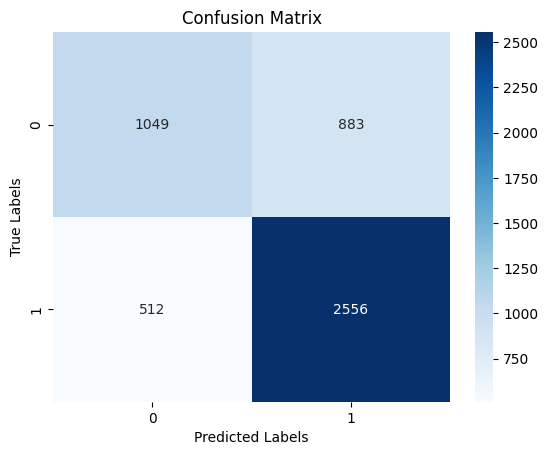

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: I was hoping for the sound of Love is Blue which I heard when I was younger but there's something wrong with this version. The rhythm is wrong and whole thing just sounds "different". disappointing
Predicted label: 1
True label: 0


Another Misclassified Review: This is a very used friendly basic sewing machine that would be good for a beginner or advanced sewer who just wants a lightweight machine to sew basic things with or transport to classes. I am more advanced and just wanted something with a few stitch functions to sew basic garments and patchwork quilts and that I could teach my Daughter to sew on and this machine is good for all these things. I had it out of the box and was sewing with ease on it just twenty minutes after it arrived. It is easy to thread both upper and bobbin thread and easy to adjust the tension and the pedal keeps a steady rhythm,it will sew slowly if you need it to and has a little get up and go if you really "floor it" but not a speed

In [ ]:
cv = CountVectorizer(ngram_range=(1,3), max_features = 10000)
traindata = cv.fit_transform(df1['cleaned_review'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(traindata, df1['overall'], test_size=0.2, shuffle = False)

### Decision Tree - Entropy

In [ ]:
dt_entropy = DecisionTreeClassifier(criterion='entropy') # Decision tree with entropy criterion
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = dt_entropy.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7212


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1932
           1       0.77      0.77      0.77      3068

    accuracy                           0.72      5000
   macro avg       0.71      0.71      0.71      5000
weighted avg       0.72      0.72      0.72      5000



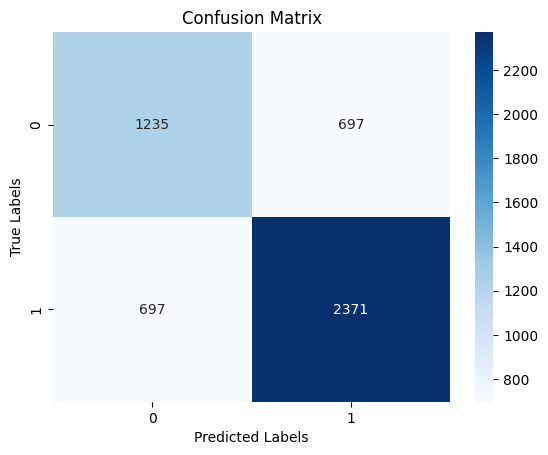

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: NOT GOOD One Star
Predicted label: 1
True label: 0


Another Misclassified Review: Not impressive at all, but without an alternative product on the market in the price range, it does do the job. Would like to see a 40hz or even 30hz slider, but oh well. To those with bulging capacitors, it's a 9 volt AC device, don't use a DC power supply. Cheap and ugly, but quiet...works good so far.
Predicted label: 0
True label: 1


### Decision Tree - Gini

In [ ]:
dt_gini = DecisionTreeClassifier(criterion='gini') # Decision tree with gini criterion
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt_gini.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.711


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.63      0.63      1932
           1       0.77      0.76      0.76      3068

    accuracy                           0.71      5000
   macro avg       0.70      0.70      0.70      5000
weighted avg       0.71      0.71      0.71      5000



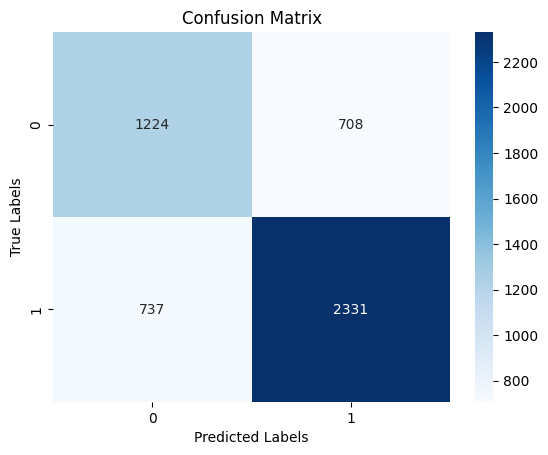

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: It's boning, and it's a lot of it. I would recommend this for people who sew a lot and do projects that require a lot of boning. I see a lot of questions about if this is good to make a hoop skirt, but I would recommend the flatter rigilene boning for that, so it doesn't show through fabric as much, especially if you aren't wearing a petticoat over it. The value of this is pretty good, seeing as if you go to a store like Joanns you either have to pay by the yard or get it in a pre-packaged 3-yd roll (good for a single bodice/corset) for 4 or so dollars, but this is 12 yds for less per yard. I never use boning caps for this type of boning, I just file the ends after I cut so there's no sharp edges that can poke through. I've accidentally sewn through it before, it's usually not a problem but I wouldn't recommend it. It's really hard to take those stitches out and if it's within your seam allowance chances are something isn't going to line up correctly. If you want 

### Random Forest - 20 trees

In [ ]:
rf_20 = RandomForestClassifier(n_estimators=20) # Random forest with 20 trees
rf_20.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
y_pred = rf_20.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.78


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1932
           1       0.82      0.82      0.82      3068

    accuracy                           0.78      5000
   macro avg       0.77      0.77      0.77      5000
weighted avg       0.78      0.78      0.78      5000



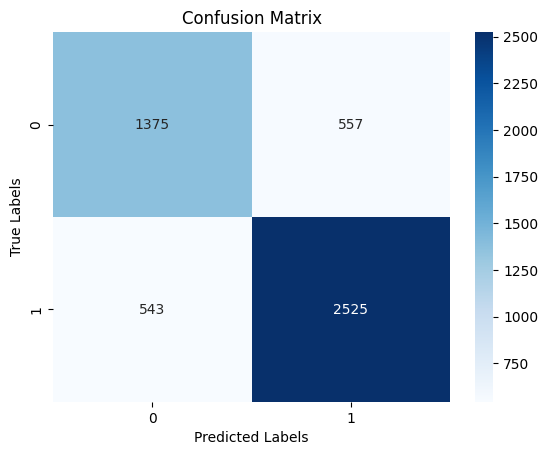

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: Sorry but was disappointed in this particular item. I'm sure its glass but it looked and felt like plastic, and none of the beads had any of the stripes as shown in the picture. Again, I'm sorry to give this negative review but this is what I got from this item; will not be ordering this one again. Sorry but was disappointed in this particular item
Predicted label: 0
True label: 1


Another Misclassified Review: Bought these for my son last year. They didn't last, weren't comfortable. He is already asking for a new pair this year. weren't comfortable. He is already asking for a new pair ...
Predicted label: 1
True label: 0


### Random Forest - 50 trees

In [ ]:
rf_50 = RandomForestClassifier(n_estimators=50) # Random forest with 20 trees
rf_50.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred = rf_50.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7802


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1932
           1       0.82      0.83      0.82      3068

    accuracy                           0.78      5000
   macro avg       0.77      0.77      0.77      5000
weighted avg       0.78      0.78      0.78      5000



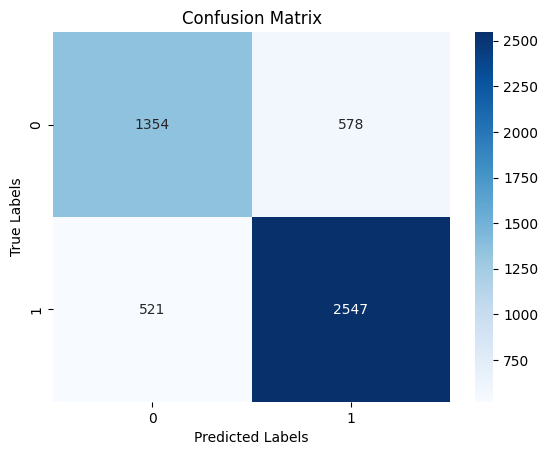

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: Probably a cool game for some....but not my kind of game. Two Stars
Predicted label: 1
True label: 0


Another Misclassified Review: This was purchased to replace our origianl Wii AC adapter, and we found it was nearly impossible to find it in a retail store.  Nintendo online was asking almost triple this price.

The description states that the product is new, however I question that.  1) it came shipped in a plastic bag, with the only identification being a generic sticker with the product name.  It could have been made with printable address labels.  There was no box, no Nintendo paperwork, nothing that would indicate a new product.
2) there were scuff marks on the side the box part of the cord as if it had been dragged on the floor.
3) one screw was shiny & new on the box part of the cord, the others were dull.

This product did work as described and we are able to use our Wii again (I'm guessing our old cord went out in a series of storms we had; it was plugge

### Random Forest - 100 trees

In [ ]:
rf_100 = RandomForestClassifier(n_estimators=100) # Random forest with 20 trees
rf_100.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_100.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7816


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1932
           1       0.82      0.83      0.82      3068

    accuracy                           0.78      5000
   macro avg       0.77      0.77      0.77      5000
weighted avg       0.78      0.78      0.78      5000



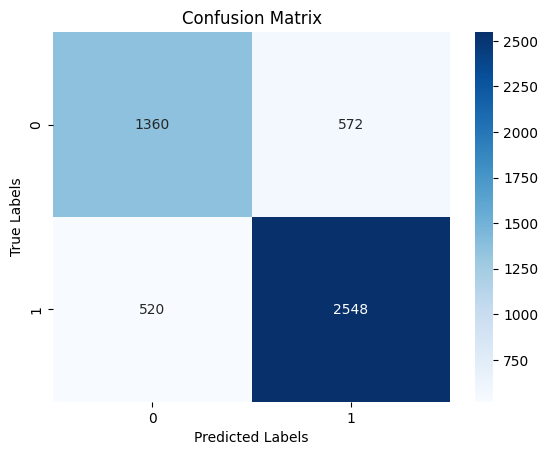

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]

index1 = random.choice(misclassified_indices)
index2 = random.choice(misclassified_indices)


print("Misclassified Review:", df1['review'][index1+20000])
print("Predicted label:", y_pred[index1])
print("True label:", y_test[index1+20000])

print("\n") # Add newline character for better readability

print("Another Misclassified Review:", df1['review'][index2+20000])
print("Predicted label:", y_pred[index2])
print("True label:", y_test[index2+20000])



Misclassified Review: I decided to order despite the many bad reviews as WOW players are not always the smartest people in the world and attributed the issues to user error. It seemed to be a nice product out of the box and had a good ergo feel. About 15 minutes after I plugged it in it died. I tried it in two other computers still dead. Worked for about 15 minutes.
Predicted label: 1
True label: 0


Another Misclassified Review: I never used to use face moisturizer, but figured I would give it a try since I bought several other products from Baxter. I really liked how this moisturizer made my face feel smooth and soft. It did not leave any oily residue either. Good product, like all other Baxter products.

-Update- I have used this for over one month and I don't think I even notice a difference. I have actually broken out in a few places on my face and am not sure if it is from this. I will not buy again, too expensive for the lack of results. Great moisturizer
Predicted label: 0
True